# Loan Prediction Based on Customer Behavior

Anggota Kelompok 3 (**Dackers**)

1. Muhammad Cikal Merdeka
2. Maulana Rifan Haditama
3. Maulana Ibrahim
4. Maria Meidiana Siahaan
5. Revita Rahmadini
6. Nugraha Eddy Wijayanto
7. Mochamad Ali Mustofa

## Problem Statement

Sebuah perusahaan pemberi pinjaman perlu melakukan verifikasi terhadap pengajuan pinjaman dari calon-calon peminjamnya (customer), perusahaan ini memiliki data-data peminjam terdahulu berikut dengan kelayakannya (kemampuan melunasi atau tidak). Perusahaan ini ingin memiliki sistem yang dapat memprediksi kelayakan untuk calon-calon peminjam di masa yang akan datang berdasarkan data-data peminjam terdahulu untuk mengurangi resiko gagal bayar.

## Goals

* Peningkatan efisiensi : Meningkatkan proses penilaian risiko kredit agar lebih efisien dan tidak memakan waktu yang berlebihan.
* Peningkatan ketepatan dalam penilaian risiko kredit: Memperbaiki tingkat ketepatan dalam menilai risiko kredit dengan menggunakan model machine learning.

## Objectives

Sasaran akhir dari proyek ini adalah menciptakan model machine learning yang dapat:

* Memprediksi risiko kredit dengan tingkat akurasi yang tinggi.
* Menilai sejumlah besar variabel dan faktor untuk menghasilkan prediksi yang komprehensif.
* Memberikan keputusan penilaian risiko secara otomatis dalam waktu yang singkat.
* Mengurangi risiko kerugian akibat penilaian risiko yang kurang tepat.


## Business Metrics

* Default rate (%) : Persentase jumlah calon nasabah yang gagal membayar pinjaman (default) dibagi dengan jumlah total nasabah. Upaya menurunkan tingkat default rate dapat mengurangi persentase pelanggan yang gagal membayar pinjaman

* Secondary Metric (opsional) : Profit perusahaan



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


In [2]:
df = pd.read_csv('Training Data.csv')

# 1. Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.sample(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
30340,30341,1526173,35,19,single,rented,yes,Police_officer,Katni,Madhya_Pradesh,13,14,0
155720,155721,2092893,50,2,single,rented,yes,Fashion_Designer,Thoothukudi,Tamil_Nadu,2,11,0
192803,192804,1929905,56,17,single,rented,no,Consultant,Khandwa,Madhya_Pradesh,14,14,0
51827,51828,432951,45,1,single,rented,yes,Technology_specialist,Shivpuri,Madhya_Pradesh,1,11,1
189501,189502,5897750,76,14,single,rented,no,Chef,Anand,Gujarat,5,11,0
14565,14566,656817,73,1,single,rented,no,Comedian,Adoni,Andhra_Pradesh,1,12,0
247788,247789,4033020,23,3,single,rented,no,Civil_engineer,Bally,West_Bengal,3,13,0
66881,66882,7951428,63,12,single,rented,yes,Hotel_Manager,Chinsurah,West_Bengal,8,11,0
146280,146281,7533473,70,12,single,norent_noown,yes,Software_Developer,Ambattur,Tamil_Nadu,4,14,0
162382,162383,1604428,66,20,single,rented,no,Physician,Sambalpur,Odisha,12,14,0


In [5]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Initial Transformation

In [7]:
# Rename beberapa columns
df.rename(columns={'CURRENT_JOB_YRS' : 'Current_Job_Years'}, inplace=True)
df.rename(columns={'CURRENT_HOUSE_YRS' : 'Current_House_Years'}, inplace=True)
df.rename(columns={'CITY' : 'City'}, inplace=True)
df.rename(columns={'STATE' : 'State'}, inplace=True)

In [8]:
# # Change data type of some columns
# df['Risk_Flag'] = df['Risk_Flag'].astype(str)

In [9]:
# Drop Id column
df.drop(columns='Id', inplace=True)

In [10]:
# Pengelompokan kolom berdasarkan jenisnya

# Numerical columns

nums = ['Income', 'Age', 'Experience', 'Current_Job_Years', 'Current_House_Years', 'Risk_Flag']

# Categorical columns

cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'City', 'State']


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.0,10.0,15.0,20.0
Current_Job_Years,252000.0,6.333877e+00,3.647053e+00,0.0,3.0,6.0,9.0,14.0
Current_House_Years,252000.0,1.199779e+01,1.399037e+00,10.0,11.0,12.0,13.0,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.0,0.0,0.0,1.0


In [12]:
df.describe(exclude=['int64','float64']).transpose()

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
City,252000,317,Vijayanagaram,1259
State,252000,29,Uttar_Pradesh,28400


In [13]:
#Categorical Counts
for col in cats :
  print(f'Value counts untuk {col} :')
  print(df[col].value_counts(), '\n')

Value counts untuk Married/Single :
Married/Single
single     226272
married     25728
Name: count, dtype: int64 

Value counts untuk House_Ownership :
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 

Value counts untuk Car_Ownership :
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64 

Value counts untuk Profession :
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer           

# Jawaban nomor 1 Descriptive Statistics

* A. Untuk tipe data sudah sesuai semua. Nama kolom secara keseluruhan sudah sesuai hanya dilakukan rename untuk memperjelas dan menyamakan format penulisan

* B. Pada dataset ini tidak terdapat missing values ataupun duplicated values

* C. Untuk nilai summary dari kolom numerical dan kategorical tidak ada yang aneh, hanya dapat dilihat pada target (Risk_Flag) terdapat class imbalance yang sangat besar, akan dihandle lebih lanjut nantinya

# **Exploratory Data Analysis (EDA)**

# 2. Univariate Analysis

In [14]:
print(df[nums].columns)
print(df[cats].columns)

Index(['Income', 'Age', 'Experience', 'Current_Job_Years',
       'Current_House_Years', 'Risk_Flag'],
      dtype='object')
Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'City', 'State'],
      dtype='object')


## Numerical Columns

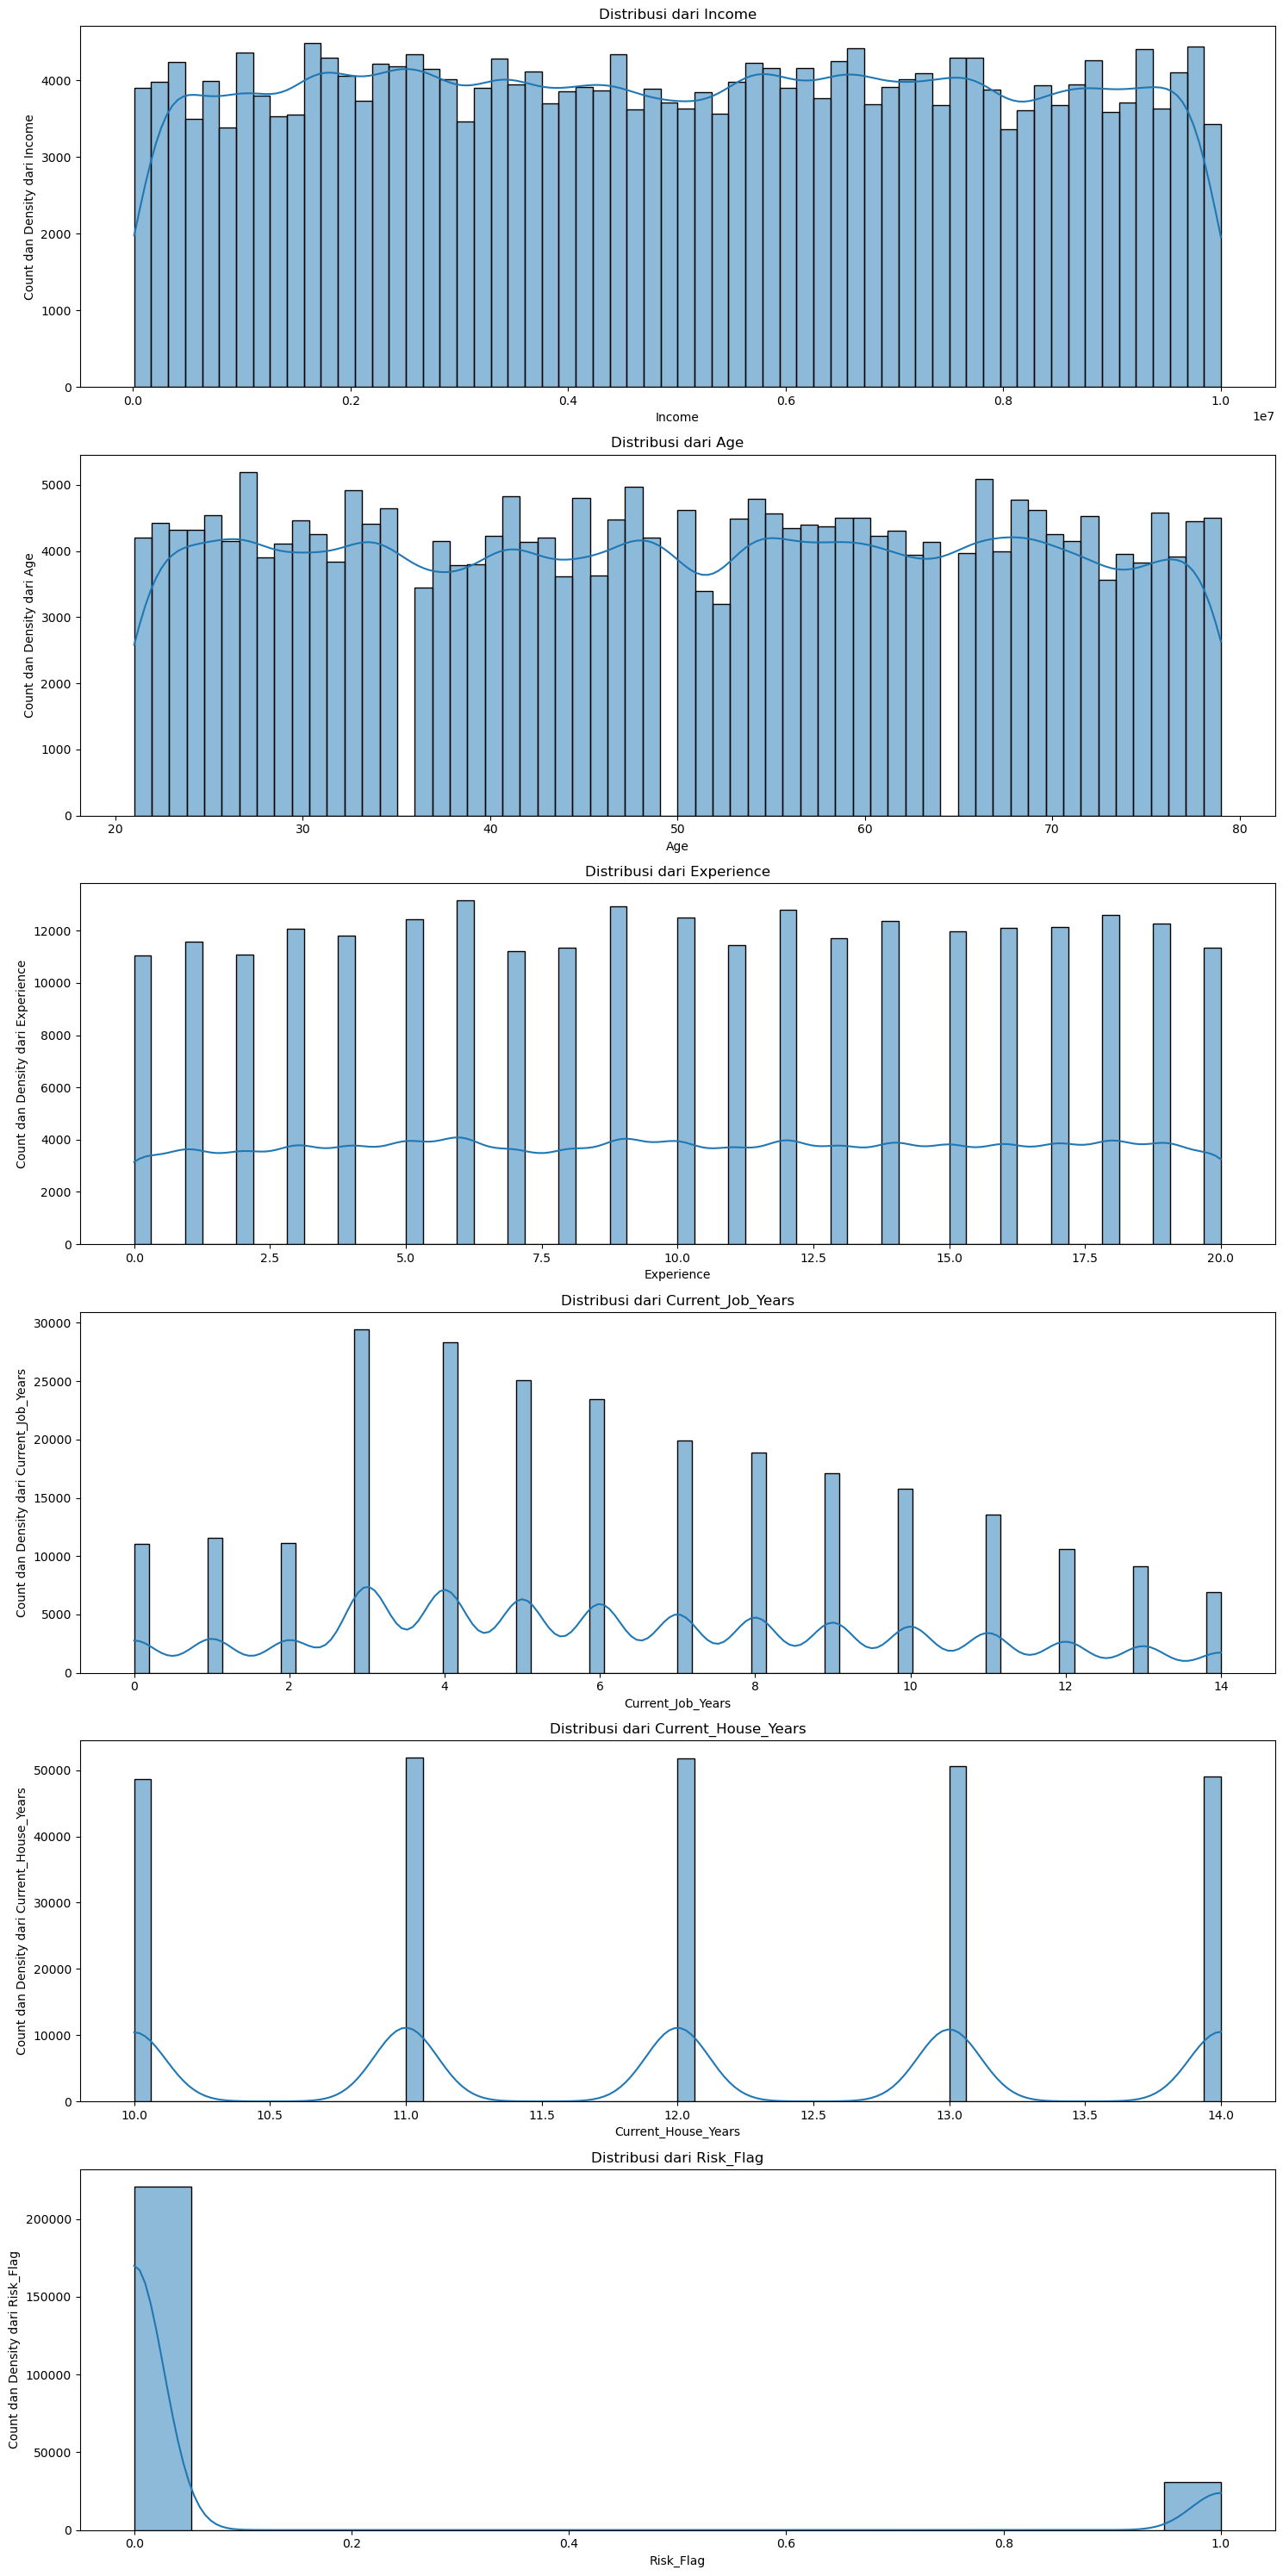

In [15]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(ax=axes[i], x=df[nums[i]], kde=True)
  axes[i].set_title(f'Distribusi dari {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density dari {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

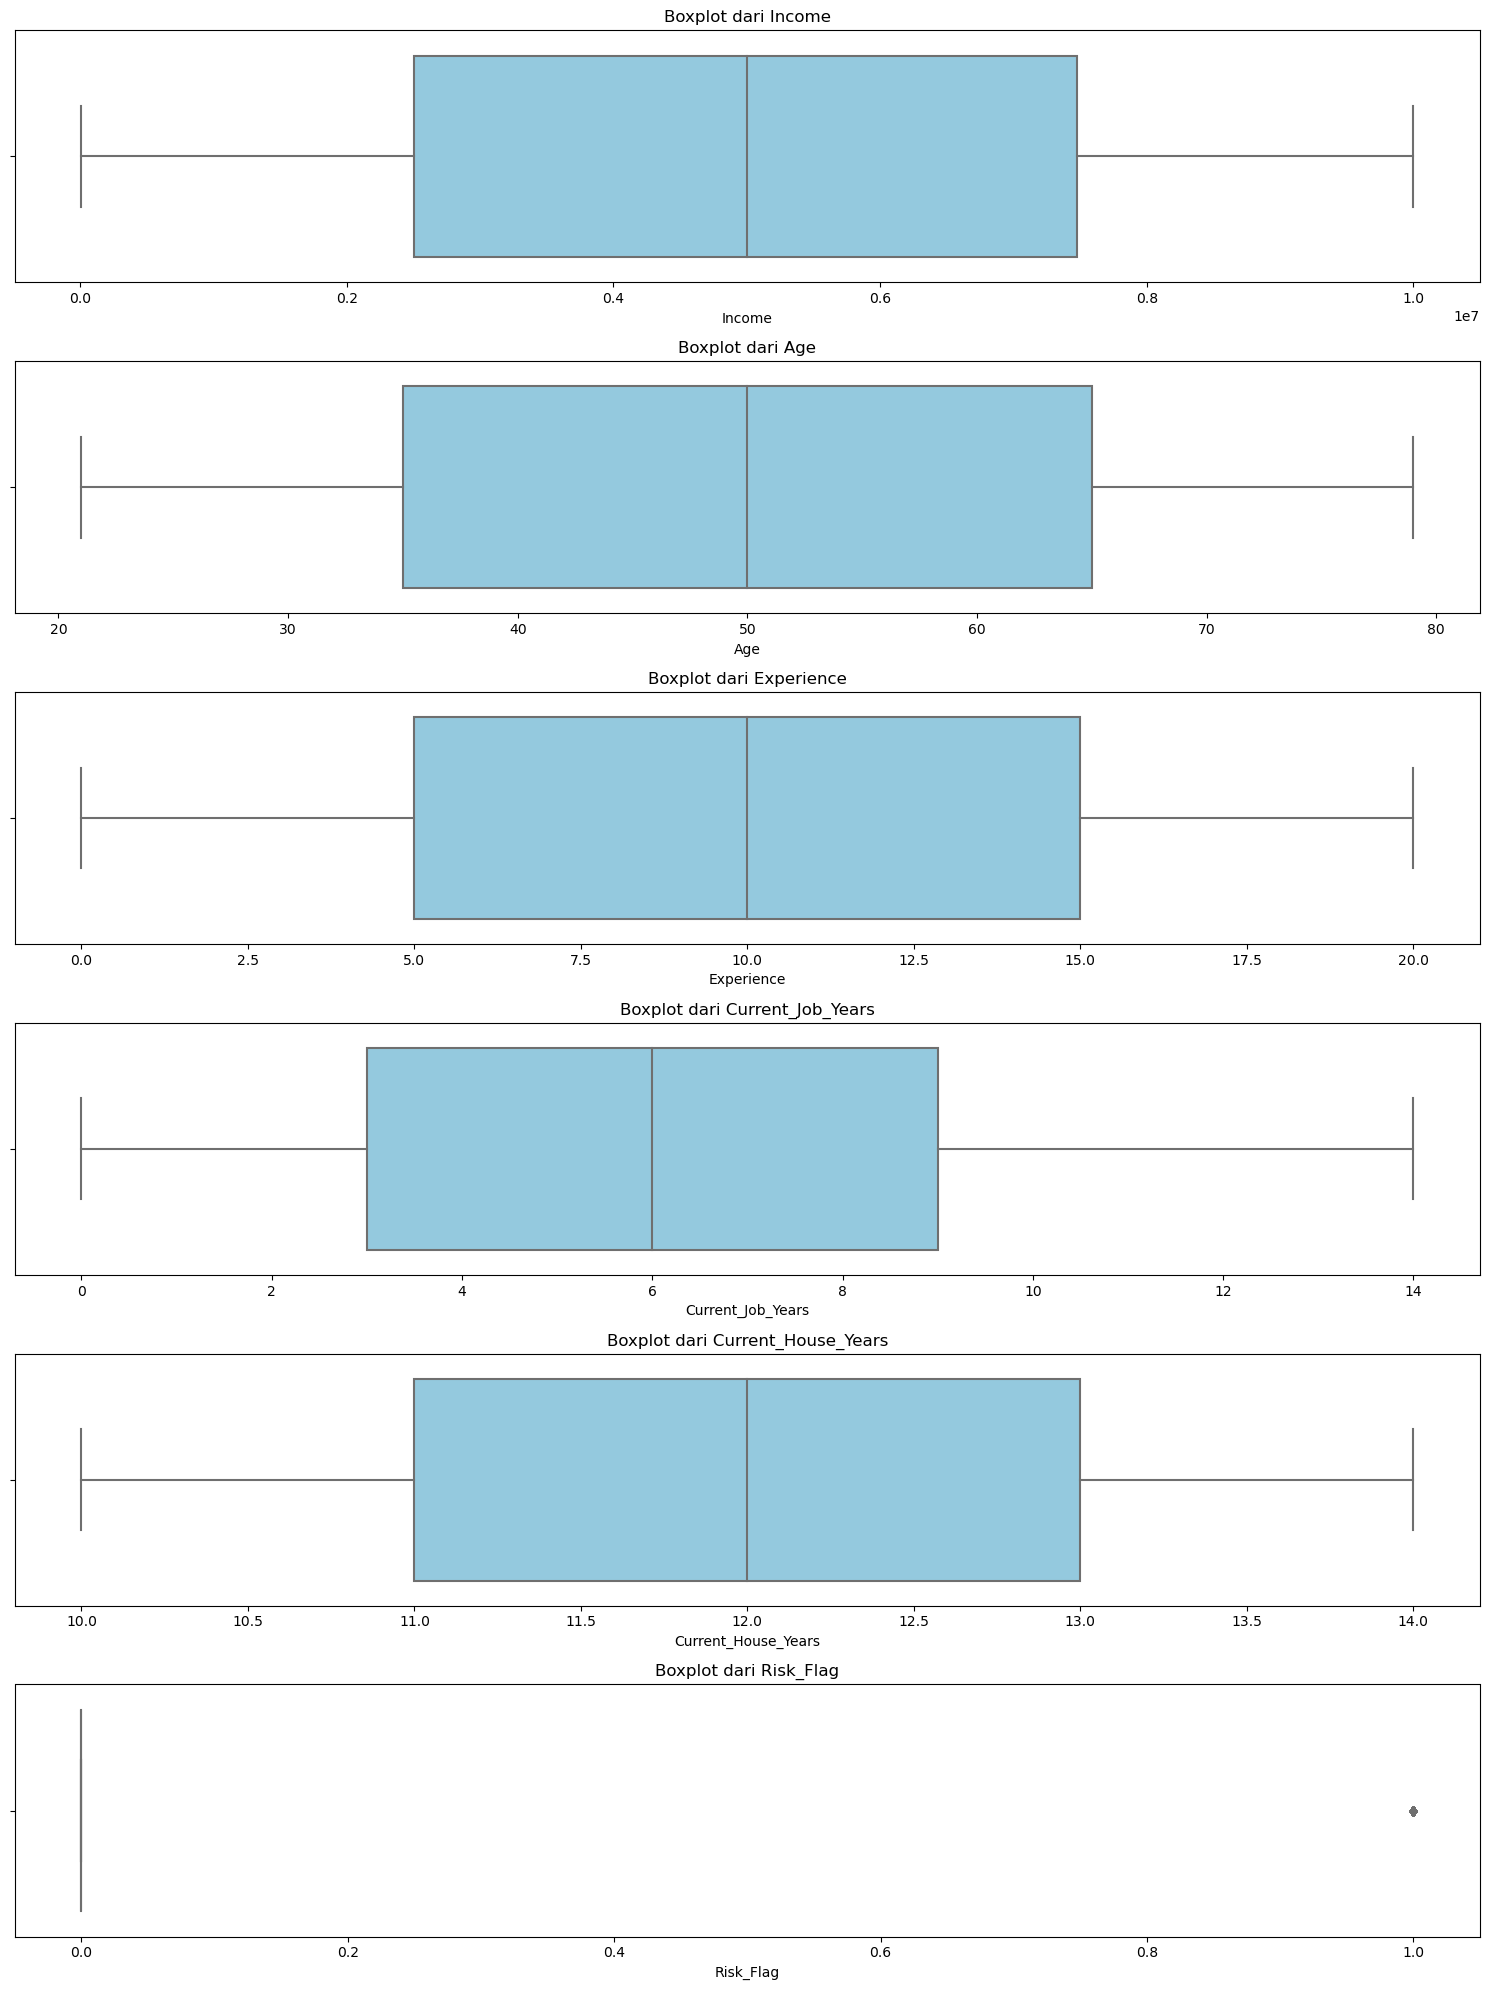

In [16]:
# Boxplot
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot dari {nums[i]}')

plt.tight_layout()

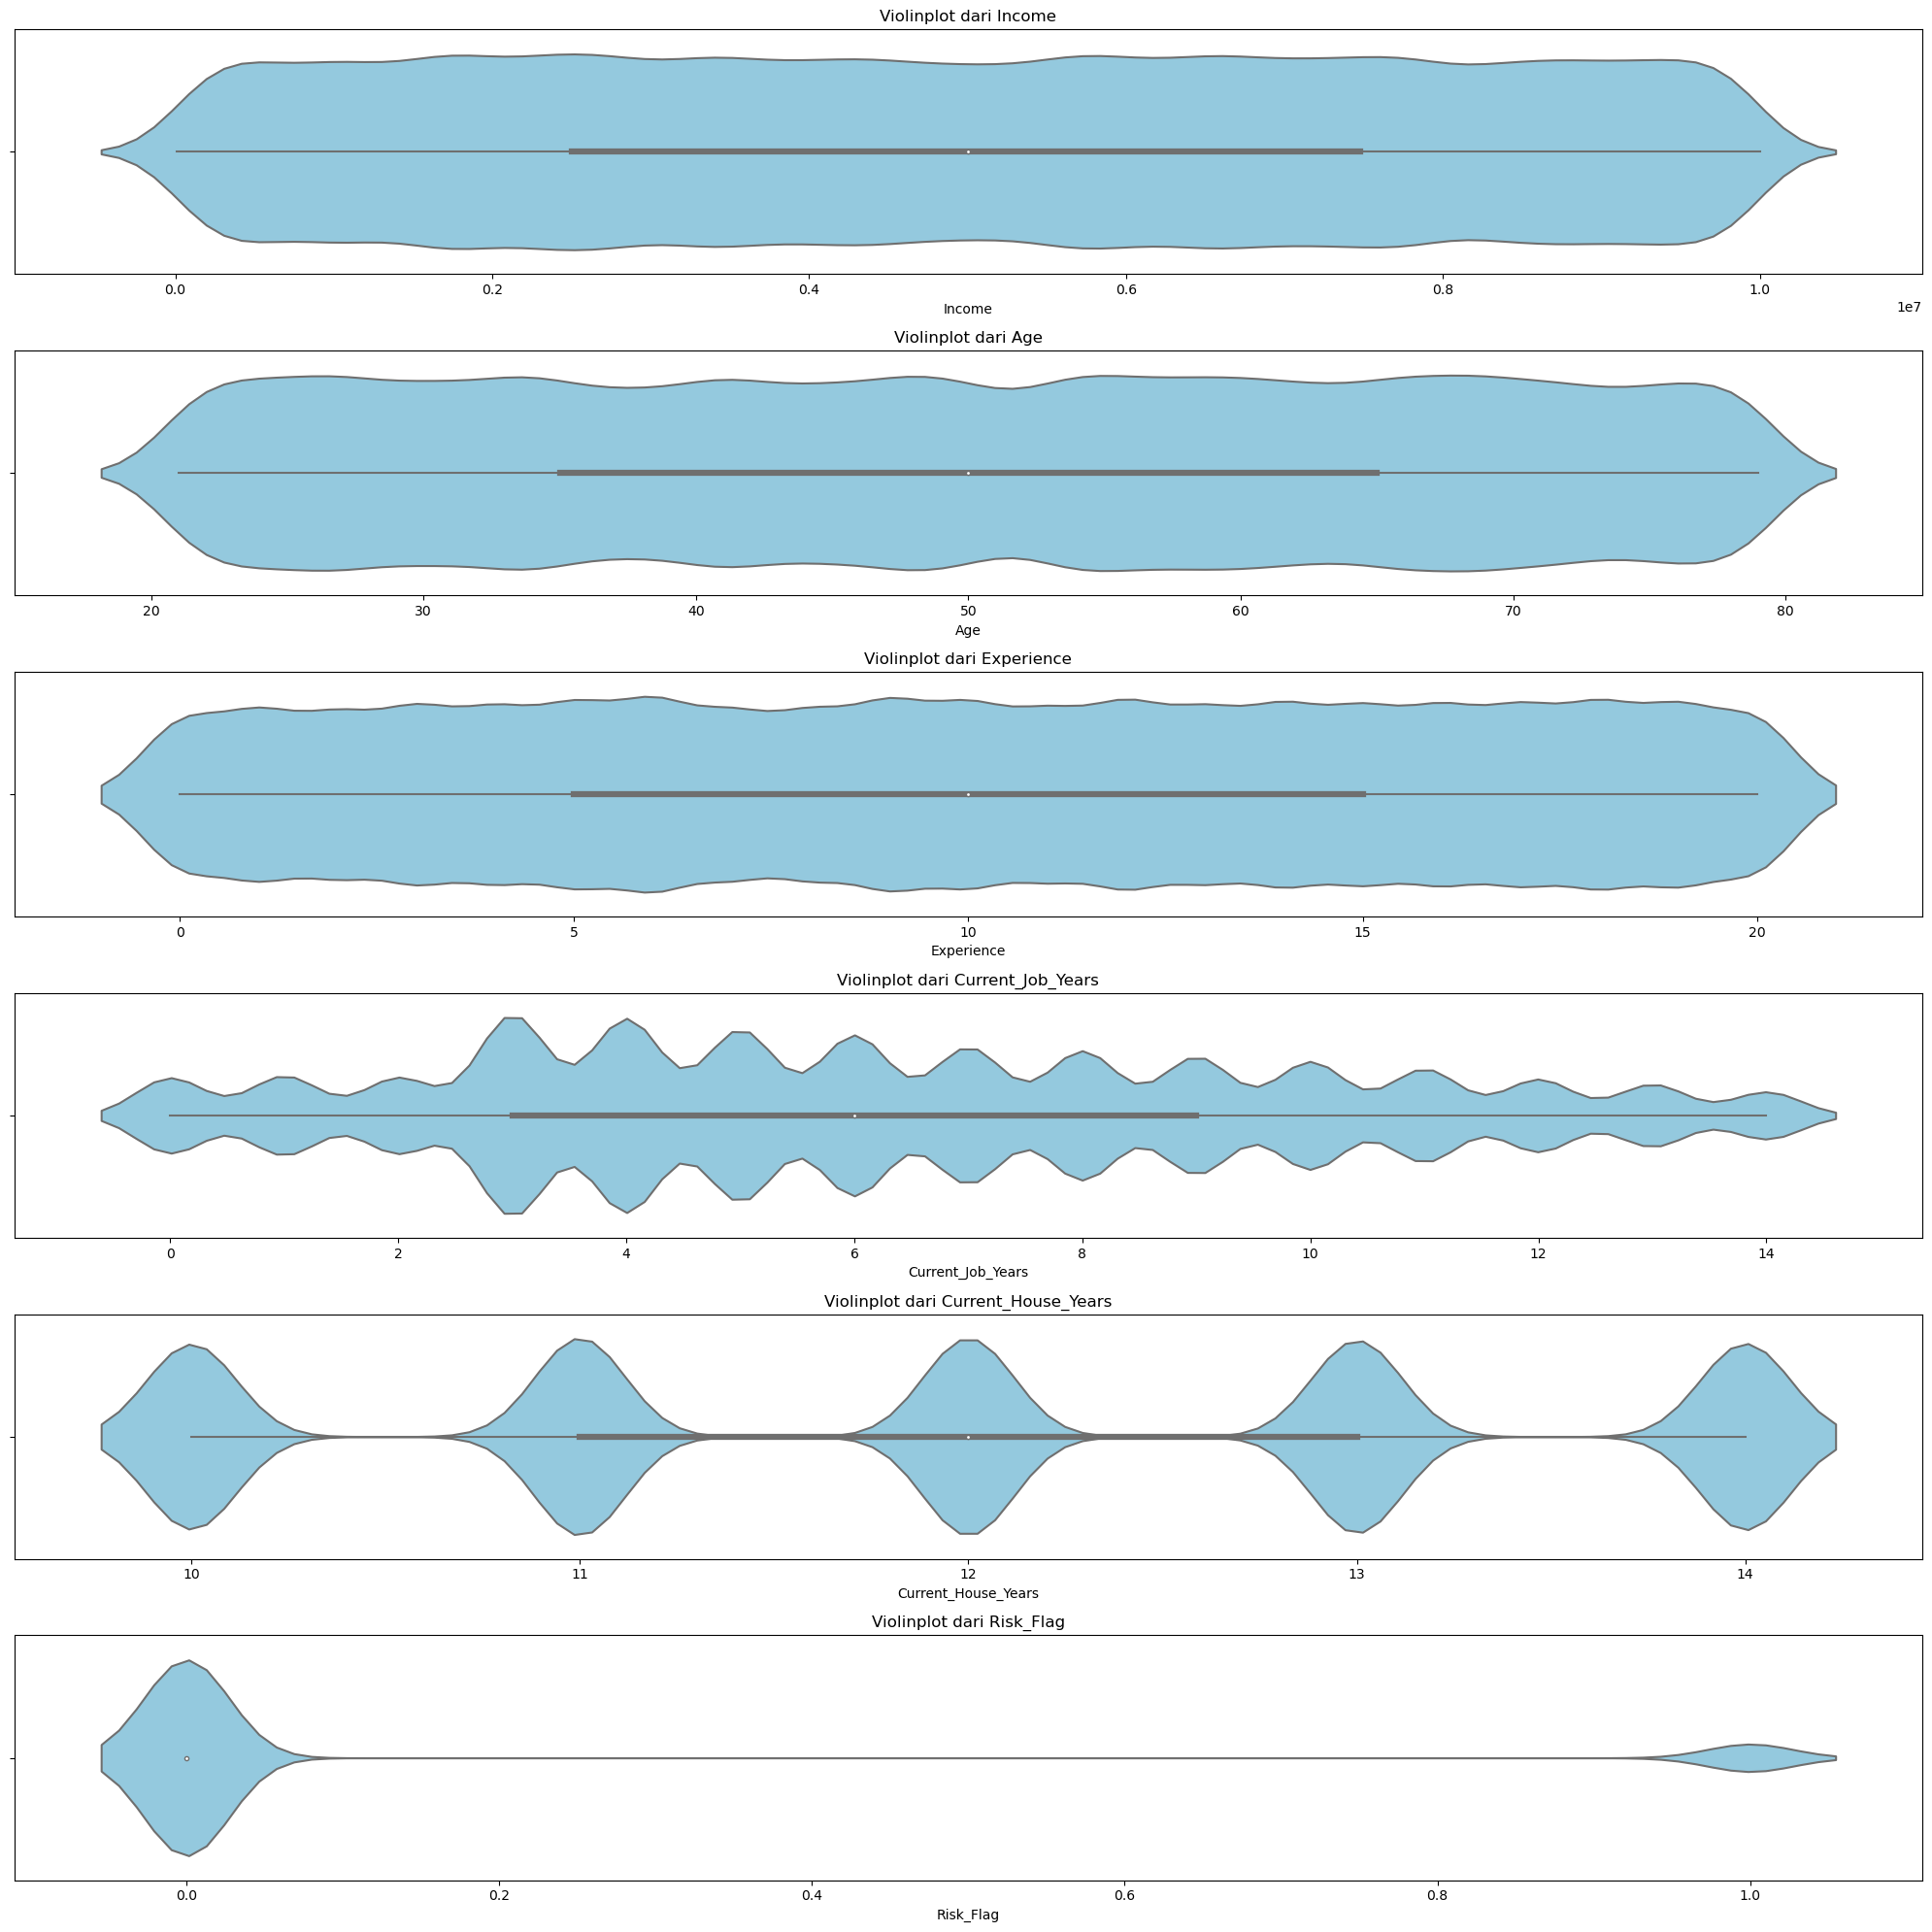

In [17]:
# Violinplot
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Violinplot dari {nums[i]}')

plt.tight_layout()

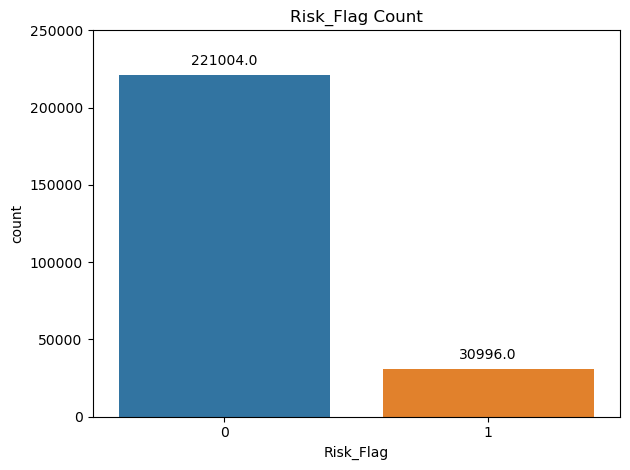

In [18]:
# Univariate Risk Flag Only
ax = sns.countplot(data=df, x='Risk_Flag')
ax.set_ylim(0, 250000)

# Adding annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Risk_Flag Count')
plt.tight_layout()
plt.show()

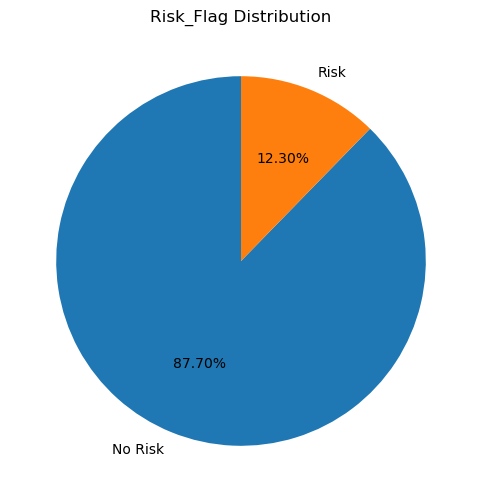

In [19]:
# Creating a pie chart with percentages
plt.figure(figsize=(6, 6))
plt.pie(df['Risk_Flag'].value_counts(), labels=['No Risk', 'Risk'], autopct='%1.2f%%', startangle=90)
plt.title('Risk_Flag Distribution')

plt.show()

## Categorical Columns

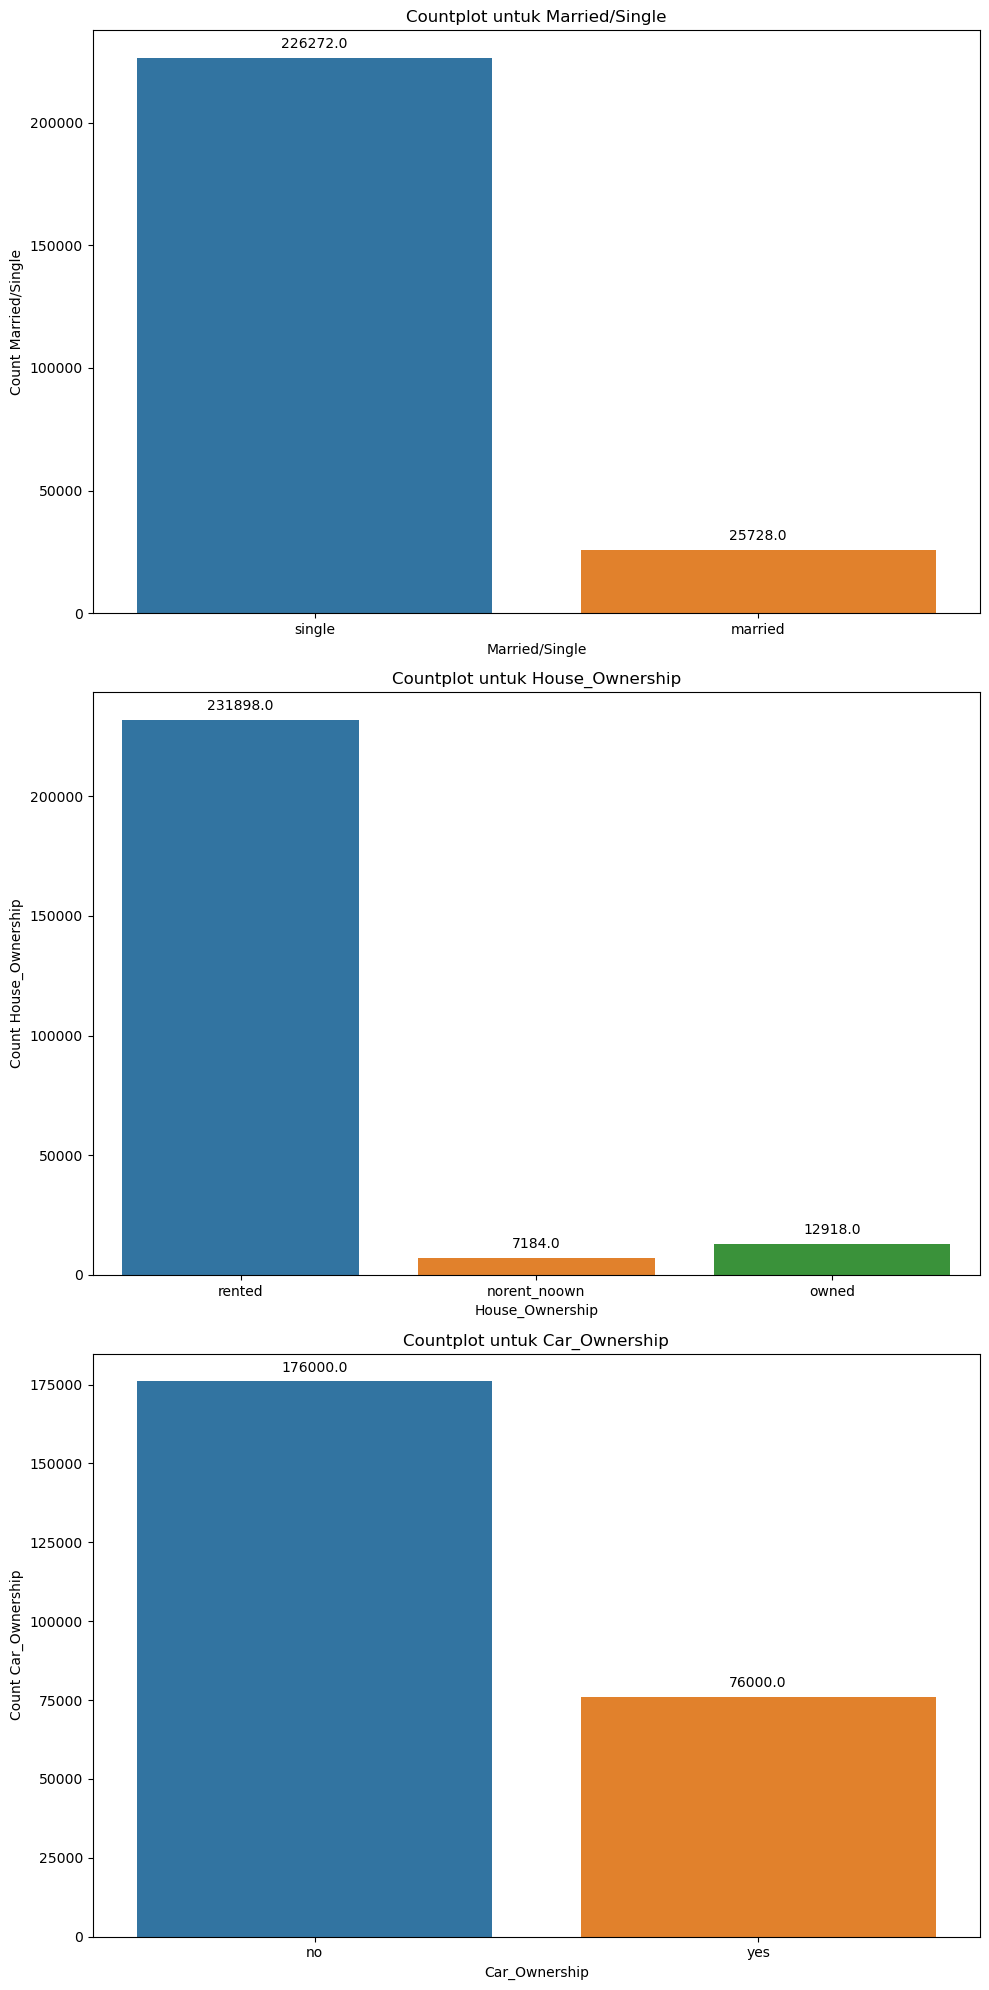

In [20]:
# Countplot Categorical (Sedikit)
cats_few = ['Married/Single', 'House_Ownership', 'Car_Ownership']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]])
    axes[i].set_title(f'Countplot untuk {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


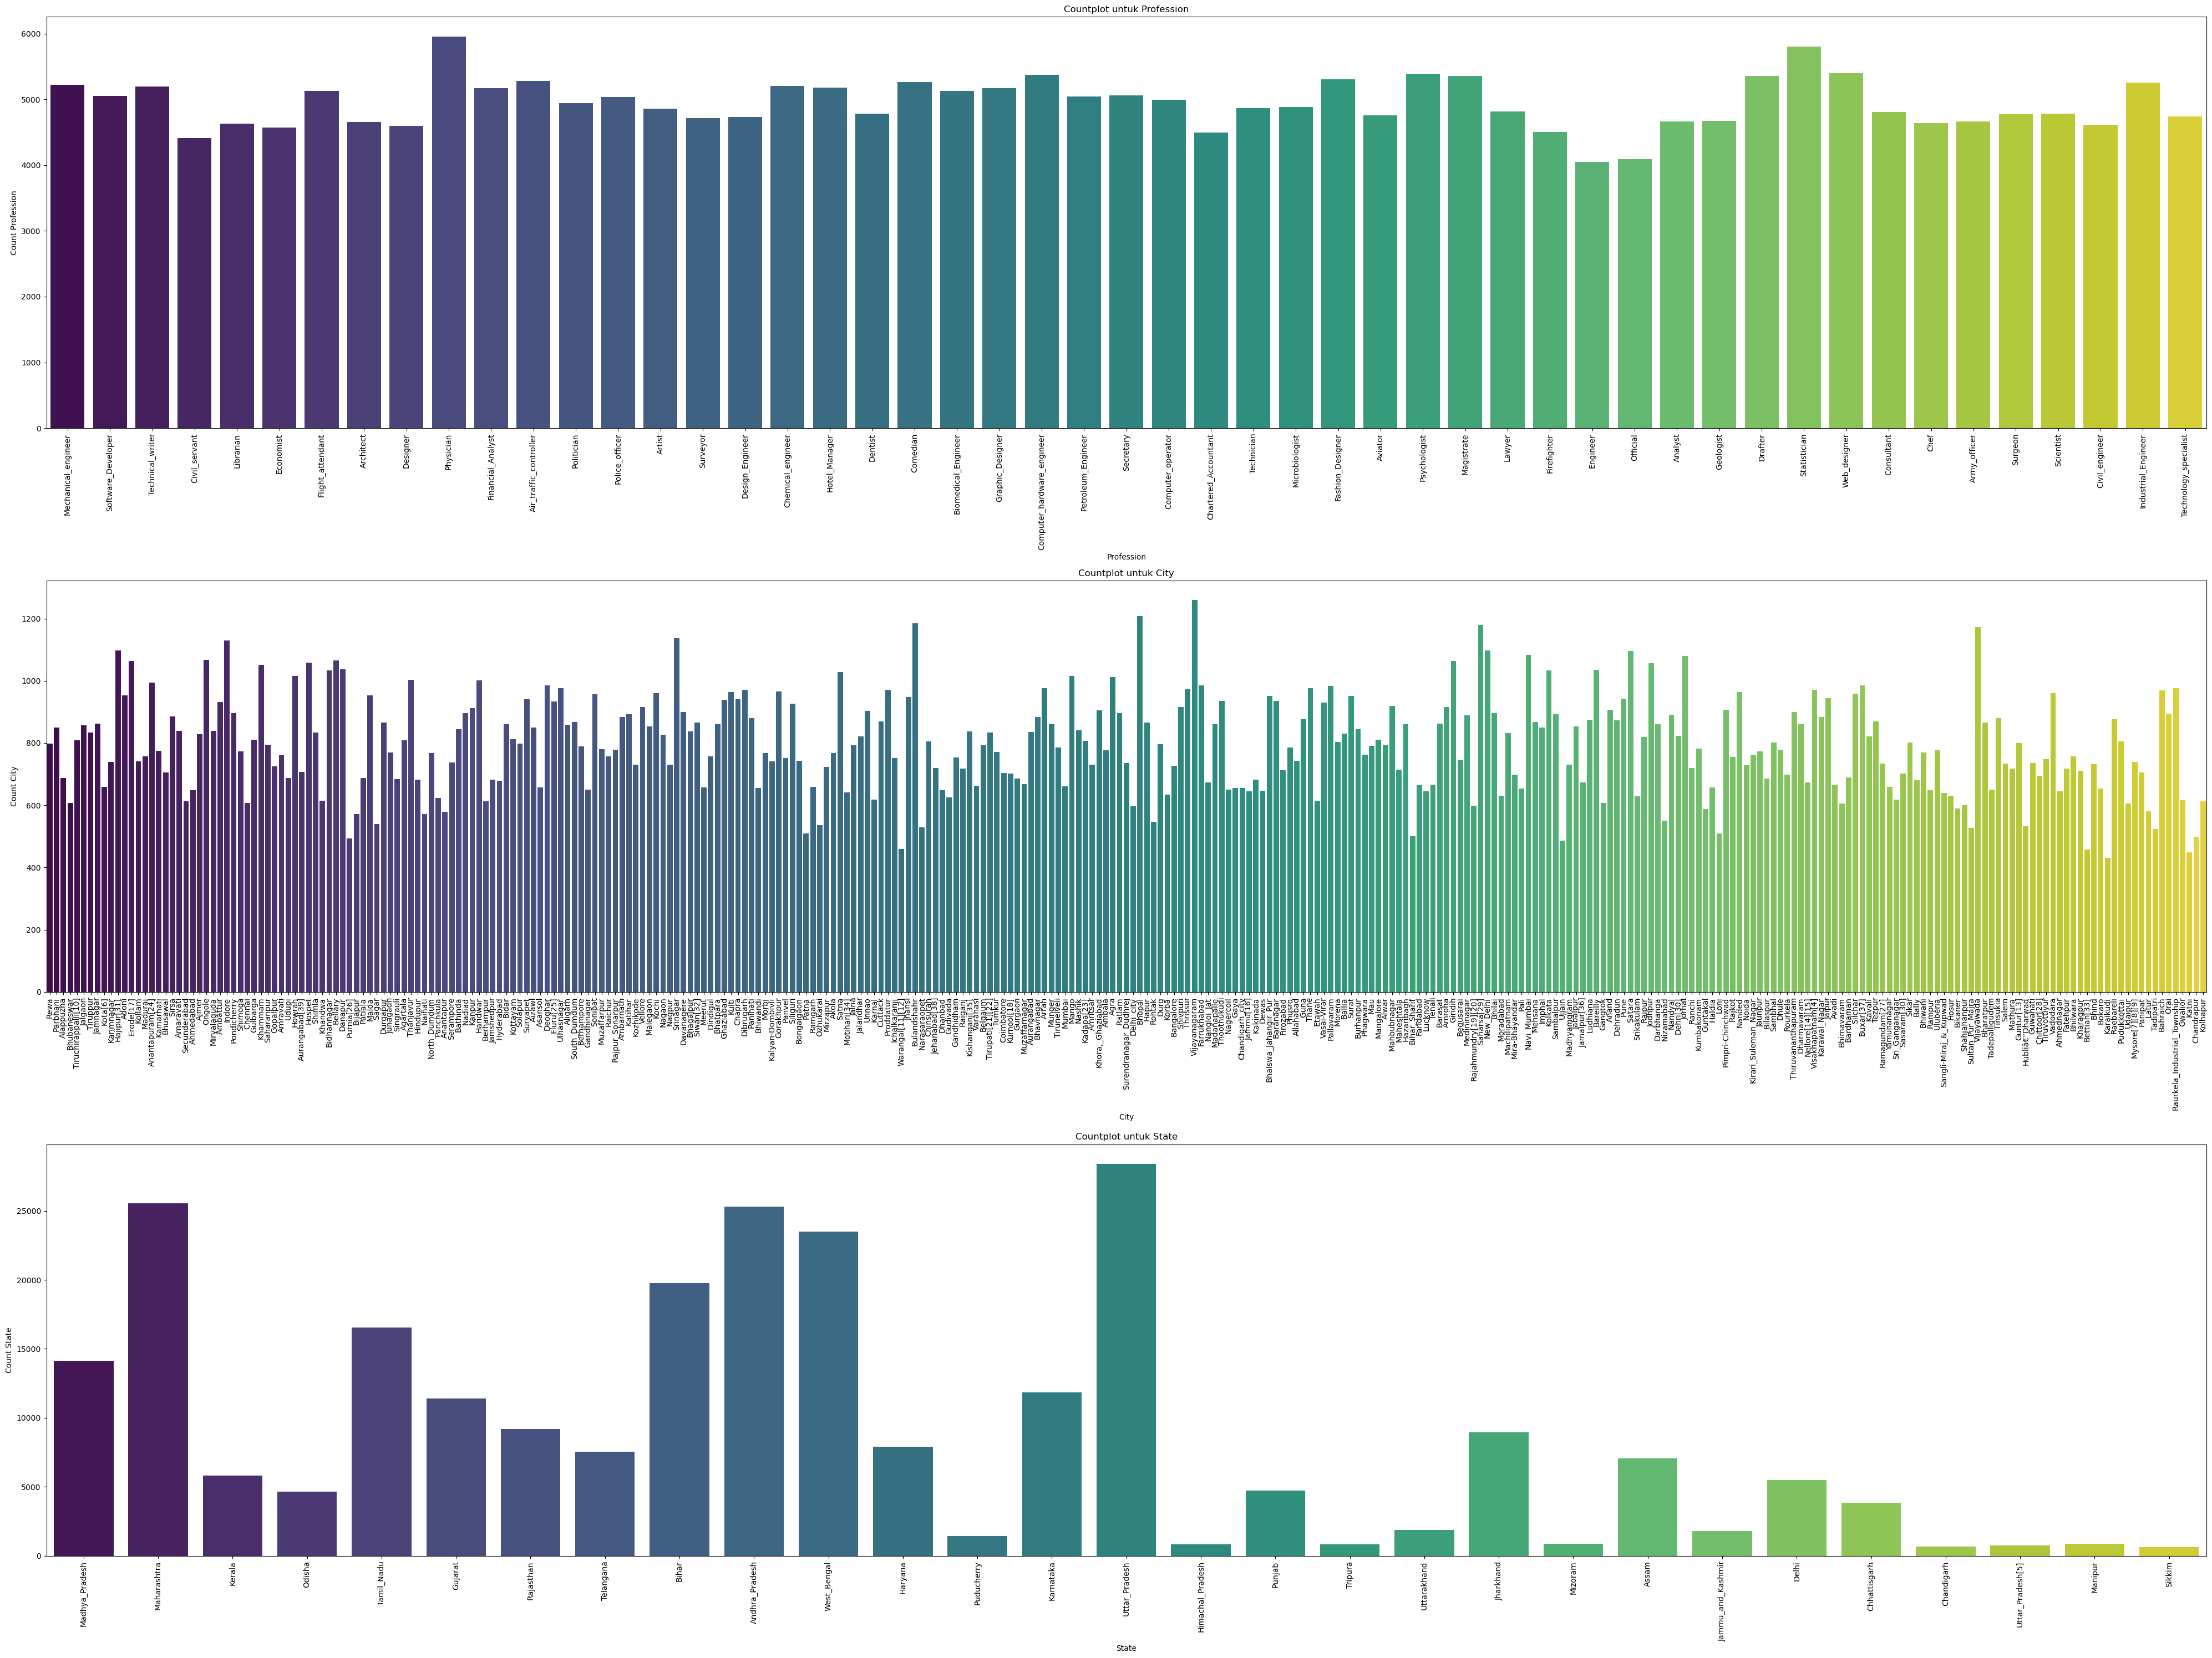

In [21]:
# Countplot Categorical (Banyak Keseluruhan)
cats_many = ['Profession', 'City', 'State']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(40, 30))

for i in range(len(cats_many)):
    sns.countplot(ax=axes[i], x=df[cats_many[i]], palette='viridis')
    axes[i].set_title(f'Countplot untuk {cats_many[i]}')
    axes[i].set_ylabel(f'Count {cats_many[i]}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#Warning: The image is better viewed in a new tab in the browser due to its large size

Profession, State, dan City terlalu banyak untuk dilakukan plotting secara keseluruhn, maka akan dilihat secara top 10 saja

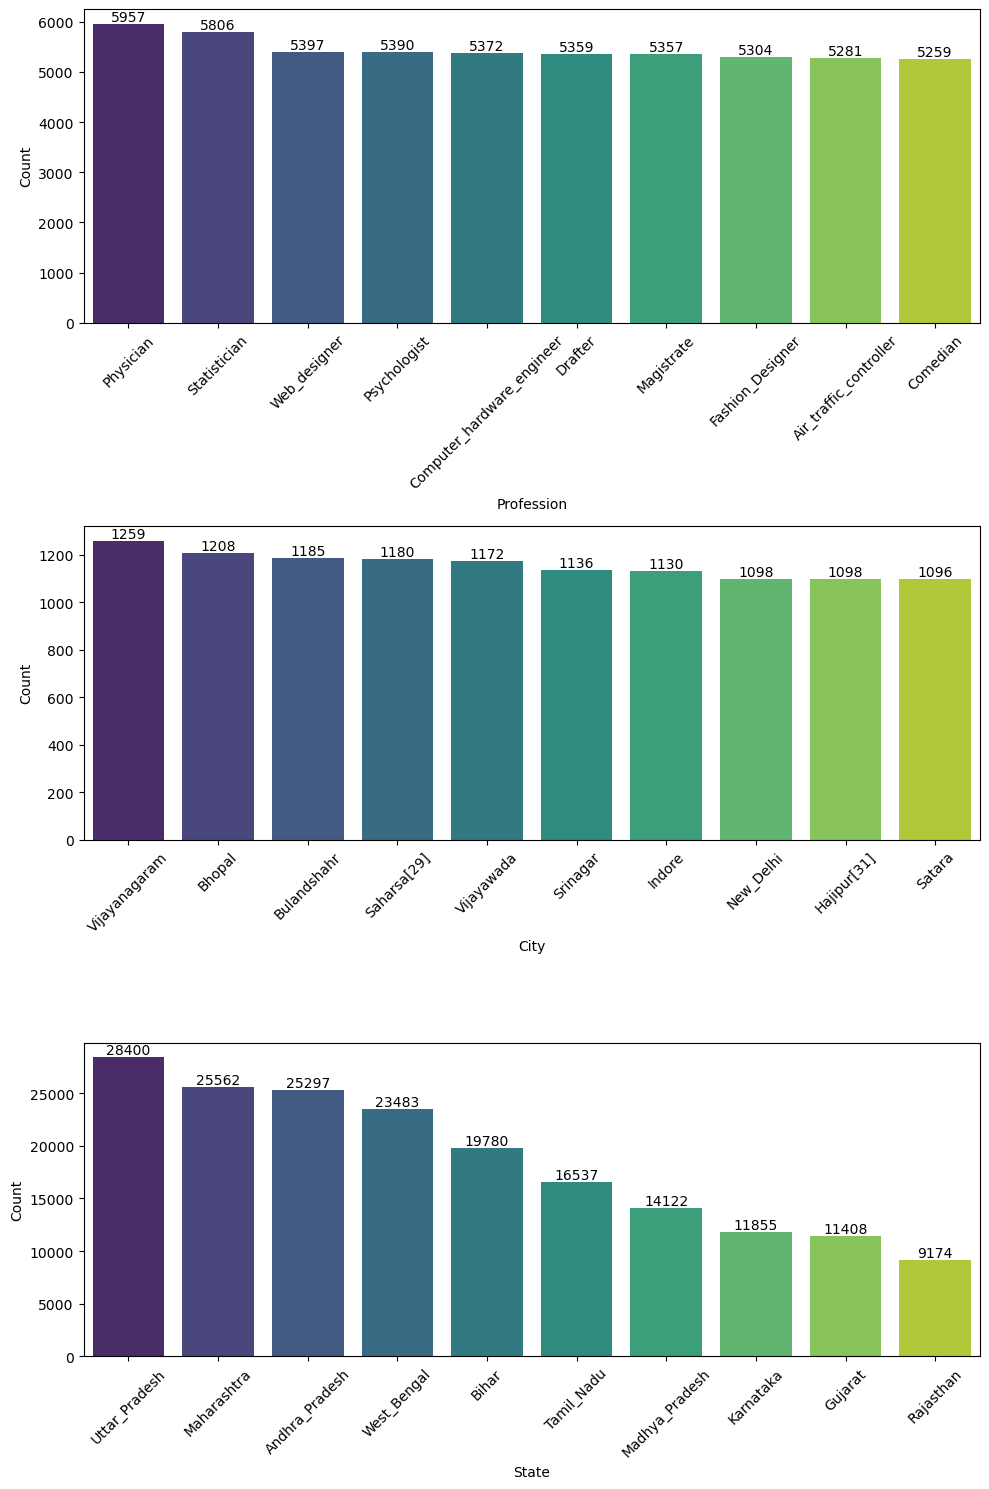

In [22]:
# Countplot Categorical (Banyak Top 10)
cats_many = ['Profession', 'City', 'State']
plt.figure(figsize=(10, 15))

for i in range(len(cats_many)):
    plt.subplot(len(cats_many), 1, i+1)
    top_10_data = df[cats_many[i]].value_counts().head(10)

    # Create countplot
    sns.barplot(x=top_10_data.index, y=top_10_data.values, palette='viridis')

    # Add count values on top of each bar
    for index, value in enumerate(top_10_data.values):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.xlabel(cats_many[i])
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


# Jawaban nomor 2 Univariate Analysis

A.  Untuk analisis pada kolom numerical, ditemukan beberapa hal seperti :

1. Untuk target (Risk_Flag) distribusinya merupakan bimodal dan cukup mendominasi pada nilai 0 (Tidak gagal bayar atau tidak default)

2. Feature Income, Age, & Experience memiliki distribusi yg cenderung seragam/uniform, feature Current_House_Years memiliki distribusi multi-modal, dan feature Current_Job_Years memiliki distribusi non-normal (skewed multi-modal) yang ditunjukkan oleh histplot dengan kde. Untuk keseluruhan feature numerical tidak terdapat outliers yang ditunjukkan oleh boxplot

3. Beberapa feature perlu dilakukan scaling seperti income dan age

B.  Untuk analisis pada kolom categorical, ditemukan beberapa hal seperti :

1. Kategori pada feature Profession, City, dan State yang terlalu banyak untuk dilakukan plotting

2. Terdapat feature dengan nilai mendominasi, antara lain: (nama kolom: nilai)
- Car_Ownership: no
- House_Ownership: rented
- Married/Single: single

C. Beberapa hal yang harus di follow-up saat data pre-processing antara lain :

1. Menghandle data categorical dari feature Profession, City, dan State yang terlalu banyak, bisa dilakukan dengan grouping/pengelompokkan tertentu dengan tujuan mengurangi jumlah nilai sebelum melakukan encoding

2. Mungkin perlu dilakukan sampling karena adanya class imbalance pada target dimana Risk_Flag 1 (Gagal bayar) hanya 12.3% dari total data yang dimana kasus ini tergolong degree of imbalance moderate(1-20%)

# 3. Multivariate Analysis

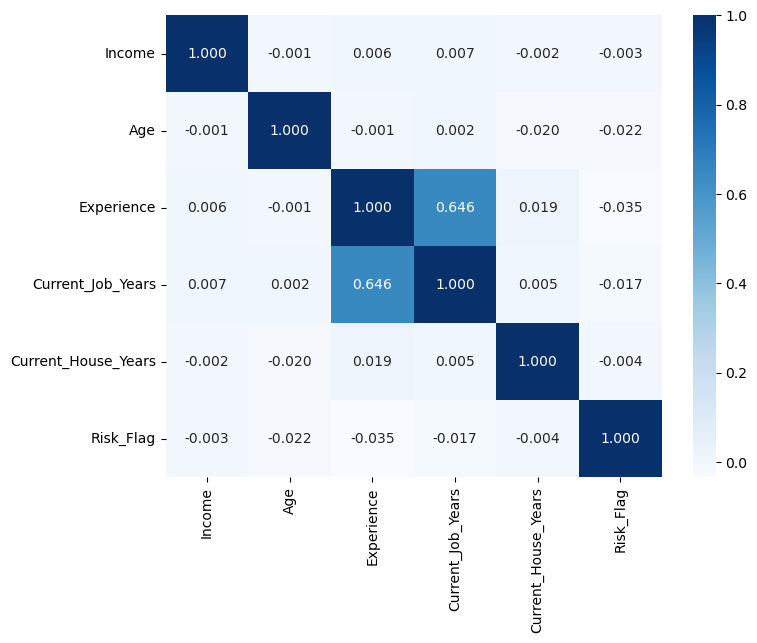

In [23]:
# Heatmap (corr pearson)
plt.figure(figsize=(8,6))
sns.heatmap(data = df.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f')
plt.show()

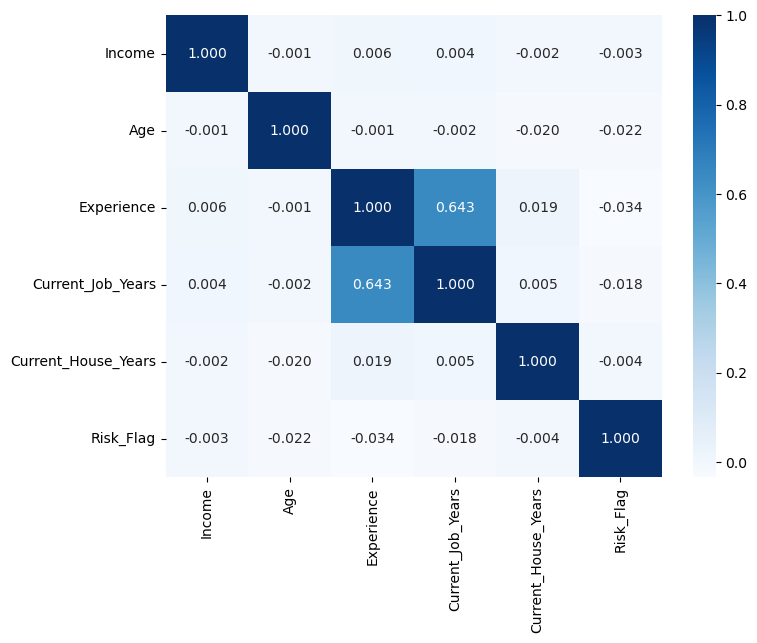

In [24]:
# Heatmap (corr spearman)
plt.figure(figsize=(8,6))
sns.heatmap(data = df.corr(method='spearman', numeric_only=True), cmap='Blues', annot=True, fmt='.3f')
plt.show()

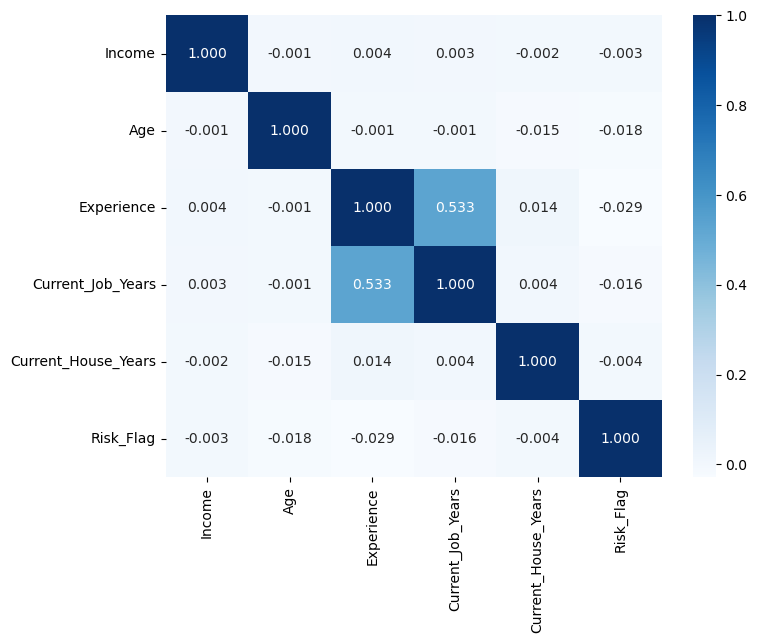

In [25]:
# Heatmap (corr kendall)
plt.figure(figsize=(8,6))
sns.heatmap(data = df.corr(method='kendall', numeric_only=True), cmap='Blues', annot=True, fmt='.3f')
plt.show()

Metode perhitungan yang paling baik untuk kasus ini adalah metode Pearson

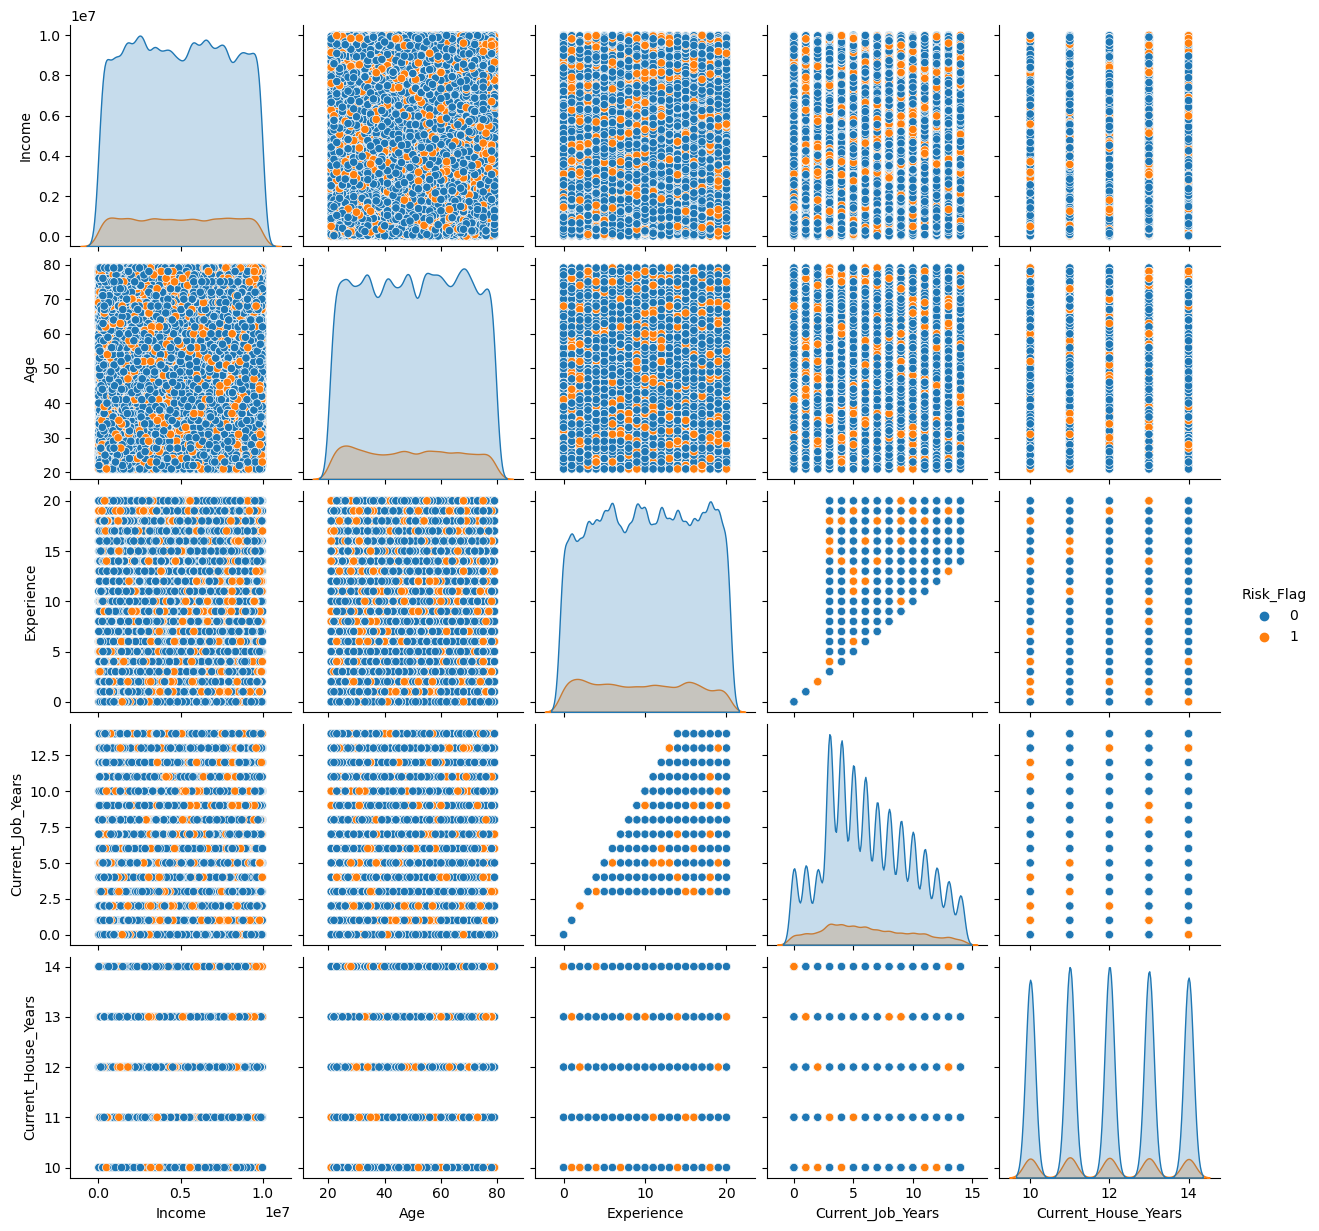

In [26]:
# Pairplot with hue Risk_Flag
sns.pairplot(df, diag_kind='kde', hue='Risk_Flag')
plt.show()

# Jawaban nomor 3 Multivariate Analysis

A. Untuk sementara dari proses EDA ini (sebelum melakukan feature encoding) hubungan antar keseluruhan feature numerical yang ada dengan target tergolong memiliki korelasi yang rendah (<0.04). Feature yang paling relevan adalah Experience (-0.035), Age (-0.022), dan Current_Job_Years (-0.017).

B. Feature Experience dan Current_Job_Years memiliki korelasi positif yang cukup tinggi (0.646). Hal ini memiliki arti bahwa semakin besar experience yang dimiliki, maka semakin lama pula current_job_years nya sekaligus mengindikasikan bahwa kedua feature ini cukup redundan sehingga perlu di-drop salah satunya. Sedangkan untuk hubungan antar fitur lainnya memiliki korelasi cukup rendah <= 0.02.

# Business Insight

### Default by Married/Single, House Ownership, and Car Ownership

### Plotting Secara Jumlah

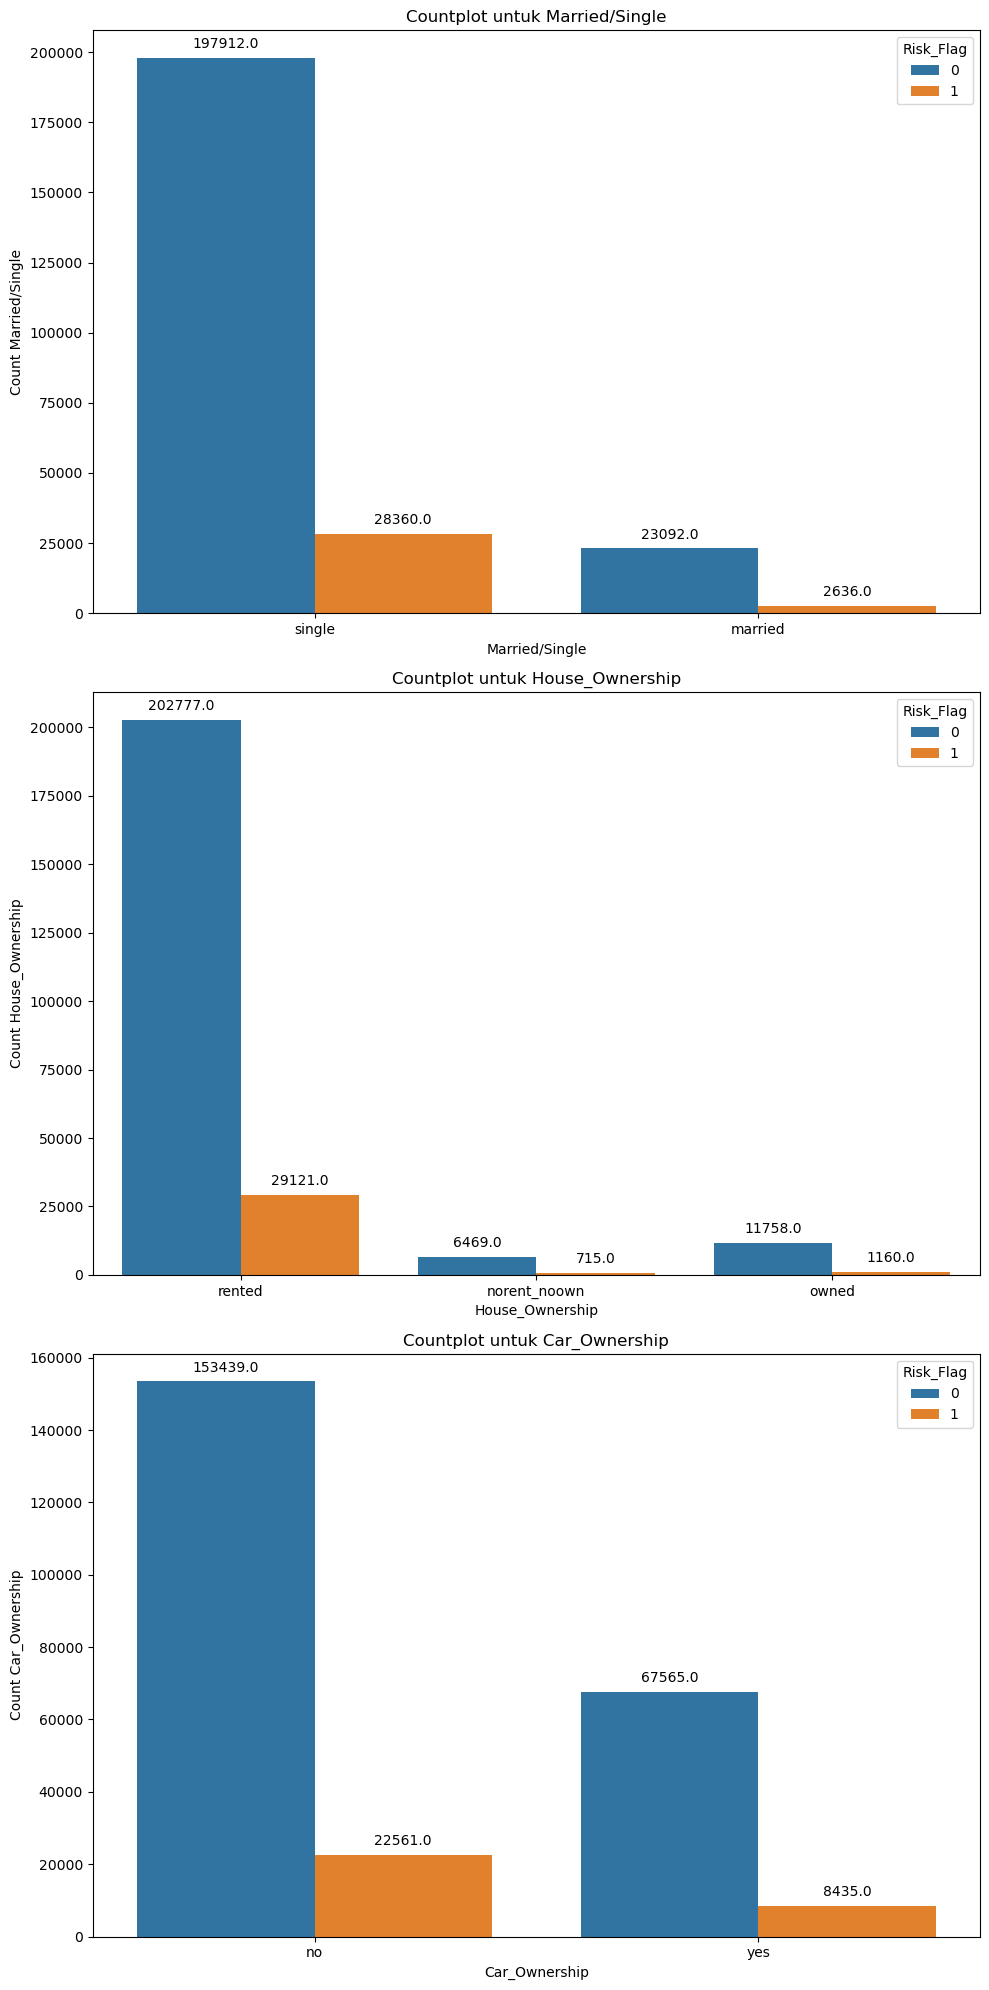

In [27]:
# Countplot Categorical (Sedikit)
cats_few = ['Married/Single', 'House_Ownership', 'Car_Ownership']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]], hue='Risk_Flag', data=df)
    axes[i].set_title(f'Countplot untuk {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


### Plotting Secara Rasio

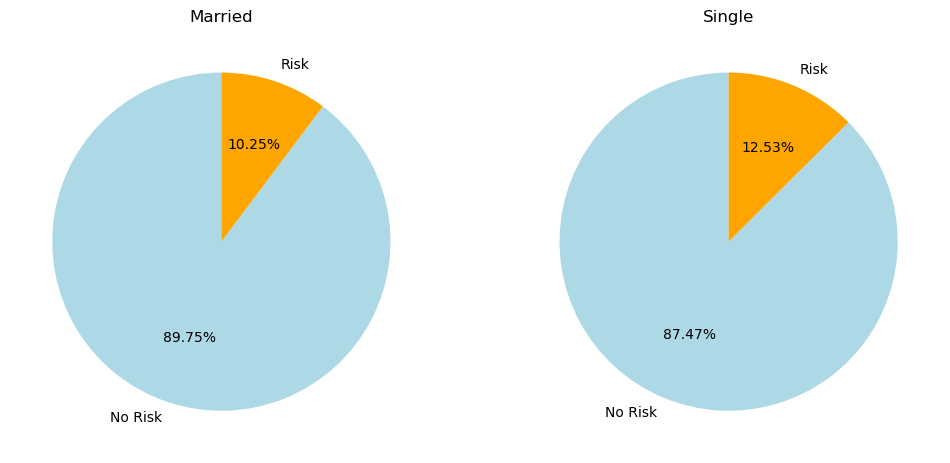

In [29]:
# Proporsi Married/Single terhadap risk_flag
proporsi_married_status = df.groupby(['Married/Single', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(proporsi_married_status.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=90)
ax[1].pie(proporsi_married_status.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=90)

ax[0].set_title('Married')
ax[1].set_title('Single')

plt.show()

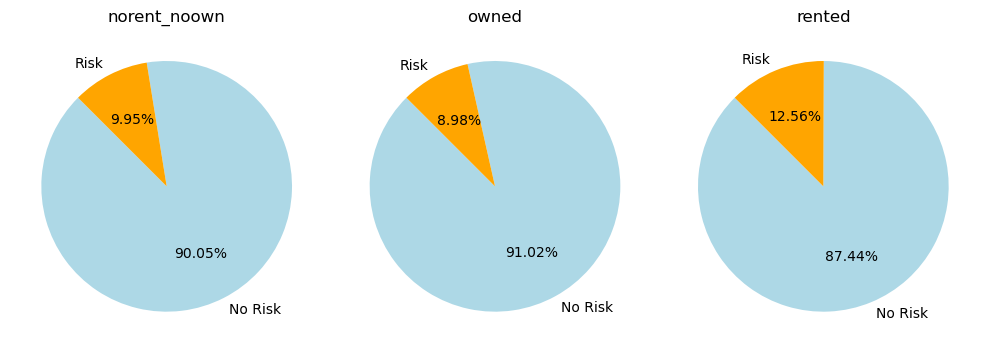

In [31]:
# Menghitung proporsi House_Ownership terhadap Risk_Flag
proporsi_house_ownership = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

# Pie chart untuk Risk_Flag = 0
ax[0].pie(proporsi_house_ownership.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[0].set_title('norent_noown')

# Pie chart untuk Risk_Flag = 1
ax[1].pie(proporsi_house_ownership.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[1].set_title('owned')

# Pie chart untuk seluruh data
ax[2].pie(proporsi_house_ownership.iloc[2,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[2].set_title('rented')

plt.tight_layout()
plt.show()

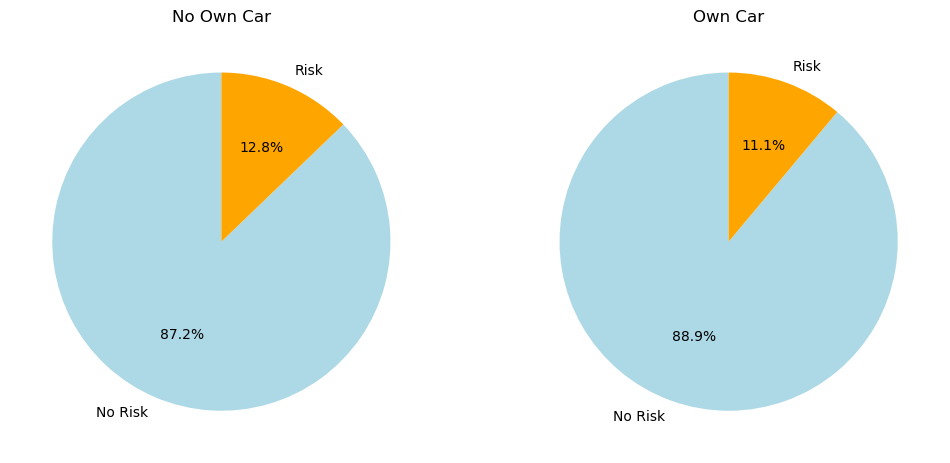

In [32]:
# Proporsi car ownership terhadap risk_flag
proporsi_car_ownership = df.groupby(['Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']
labels = proporsi_car_ownership.columns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(proporsi_car_ownership.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.1f%%', colors=colors, startangle=90)
ax[1].pie(proporsi_car_ownership.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.1f%%', colors=colors, startangle=90)

ax[0].set_title('No Own Car')
ax[1].set_title('Own Car')

plt.show()

Insight :

Dari informasi feature kategorikal, customer yang mengajukan pinjaman (loan) kebanyakan berasal dari golongan yang single, hanya memiliki rumah sewa (rented), dan tidak memiliki mobil. Jika dibandingkan untuk setiap kategori, maka :

* Pertama berdasarkan status married atau single, customer yang single sedikit lebih cenderung berpotensi gagal bayar (default) dibandingkan customer married
* Kedua, berdasarkan status rumah customer, customer yang memiliki rumah sewa (rented) cenderung memiliki potensi gagal bayar yang lebih tinggi (default) dibandingkan customer yang memiliki rumah pribadi atau tidak memiliki rumah/sewa
* Ketiga, berdasarkan status kepemilikan kendaraan mobil, customer yang tidak memiliki mobil sedikit lebih cenderung berpotensi gagal bayar dibandingkan yang memiliki mobil

Namun, perlu digarisbawahi bahwa hal-hal tersebut bisa jadi bias dikarenakan jumlah dari data yang tersedia terhadap kategori tersebut yang memang lebih banyak dibandingkan kategori yang lainnya.

### Default by Profession

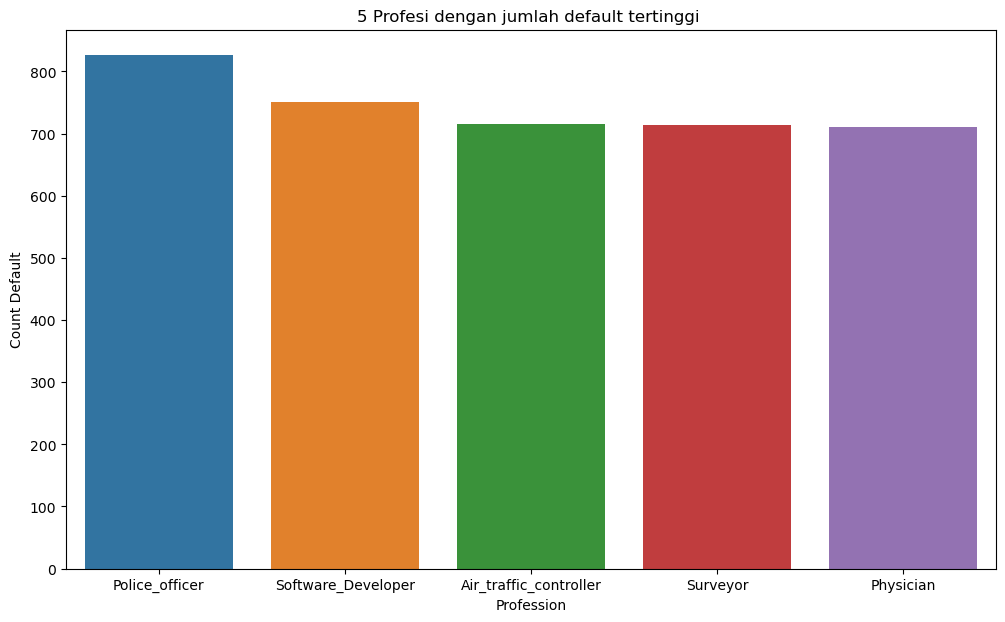

In [33]:
# Top 5

plt.figure(figsize=(12,7))
default_profession_top_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().head(5)
sns.barplot(x='Profession', y='Risk_Flag', data=default_profession_top_5)
plt.ylabel('Count Default')
plt.title('5 Profesi dengan jumlah default tertinggi ')
plt.show()

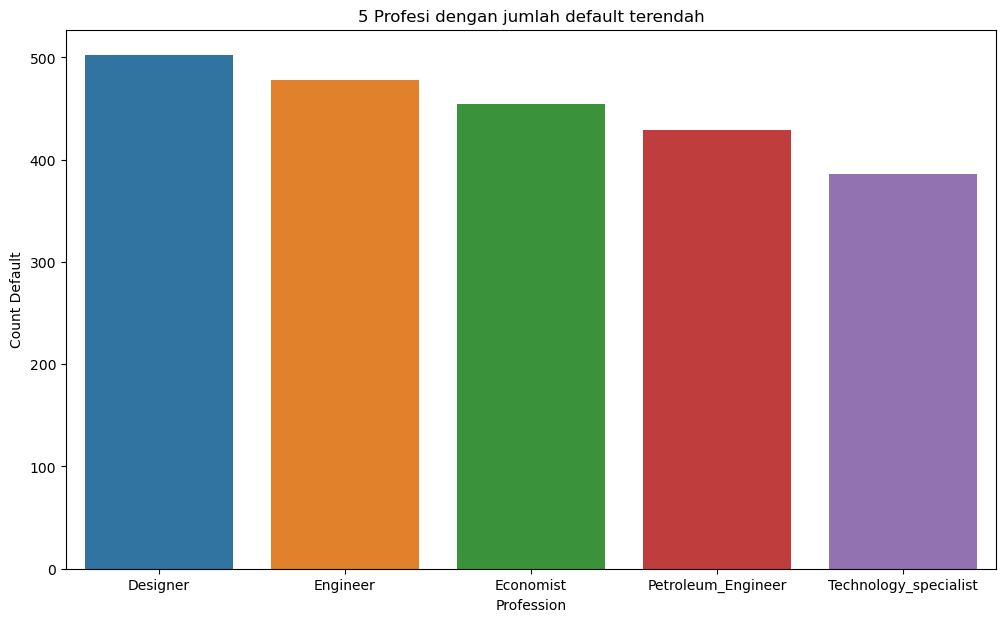

In [34]:
# Bottom 5

plt.figure(figsize=(12,7))
default_profession_bottom_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().tail(5)
sns.barplot(x='Profession', y='Risk_Flag', data=default_profession_bottom_5)
plt.ylabel('Count Default')
plt.title('5 Profesi dengan jumlah default terendah')
plt.show()

Insight :

Police_Officer, Software_Developer, Air_Traffic_Controller, Surveyor, dan Physician merupakan profesi yang memiliki jumlah default paling tinggi; sedangkan profesi Designer, Engineer, Economist, Petroleum_Engineer, Technology_Specialist merupakan profesi dengan jumlah default terendah

### Default by State

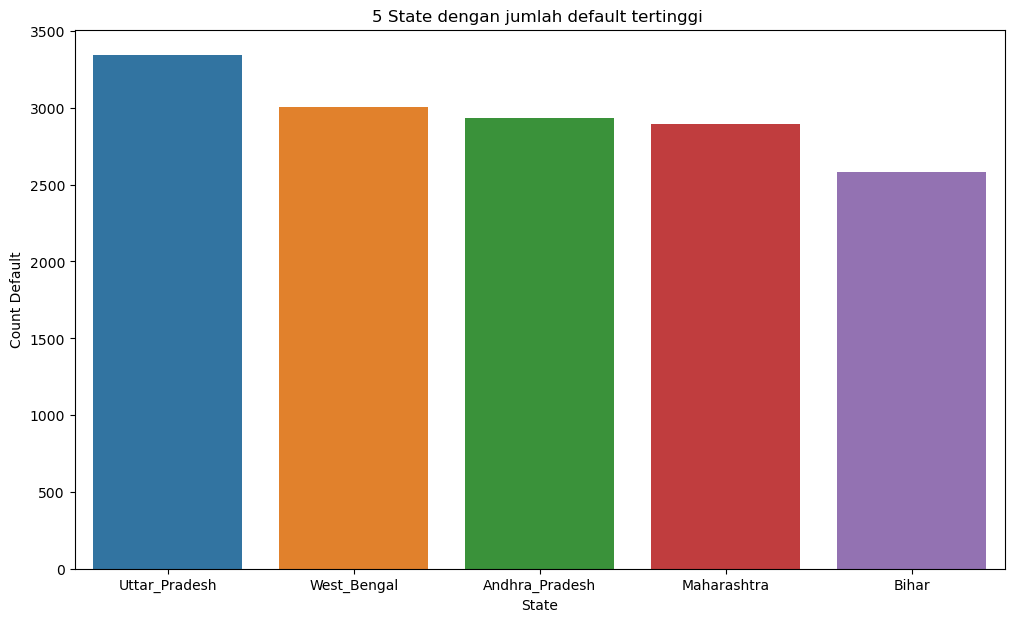

In [35]:
# Top 5

plt.figure(figsize=(12,7))
default_state_top_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().head(5)
sns.barplot(x='State', y='Risk_Flag', data=default_state_top_5)
plt.ylabel('Count Default')
plt.title('5 State dengan jumlah default tertinggi ')
plt.show()

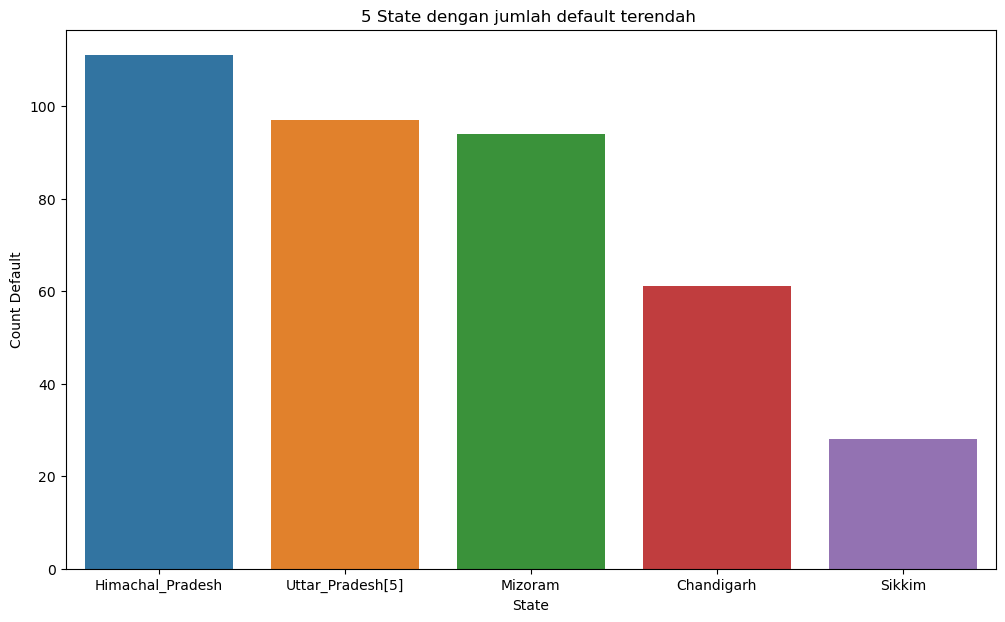

In [36]:
# Bottom 5

plt.figure(figsize=(12,7))
default_state_bottom_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().tail(5)
sns.barplot(x='State', y='Risk_Flag', data=default_state_bottom_5)
plt.ylabel('Count Default')
plt.title('5 State dengan jumlah default terendah ')
plt.show()

Insight :

Uttar Pradesh, West Bengal, Andhra Pradesh, Mahasashtra, dan Bihar adalah 5 besar state yang memiliki customer dengan default paling besar; sedangkan Himachal_Pradesh, Uttar_Pradesh[5], Mizoram, Chandigarh, dan Sikkim merupakan state dengan jumlah customer default terendah



### Default by City

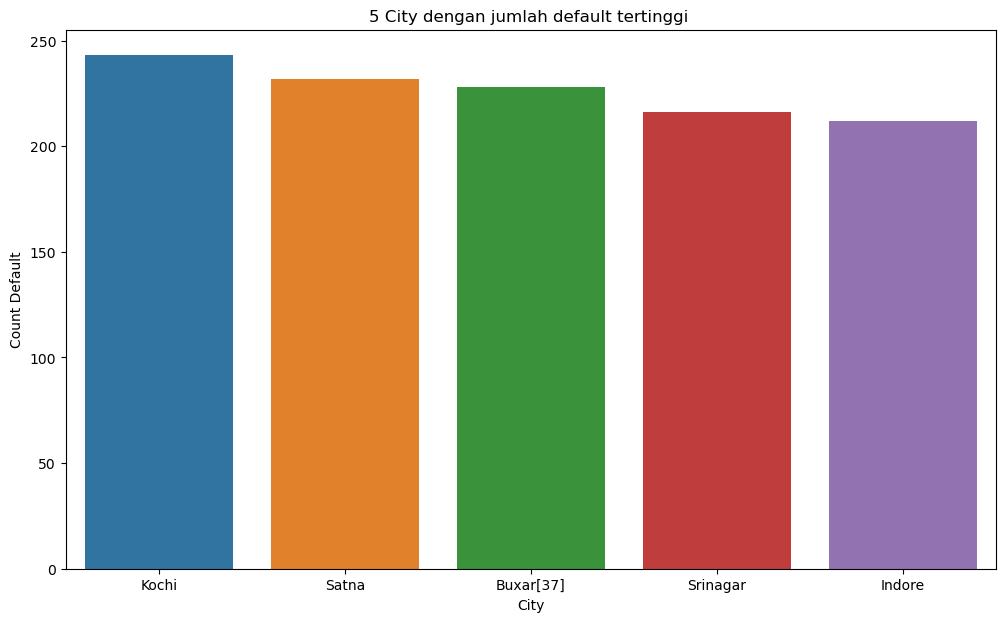

In [37]:
# Top 5

plt.figure(figsize=(12,7))
default_city_top_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().head(5)
sns.barplot(x='City', y='Risk_Flag', data=default_city_top_5)
plt.ylabel('Count Default')
plt.title('5 City dengan jumlah default tertinggi ')
plt.show()

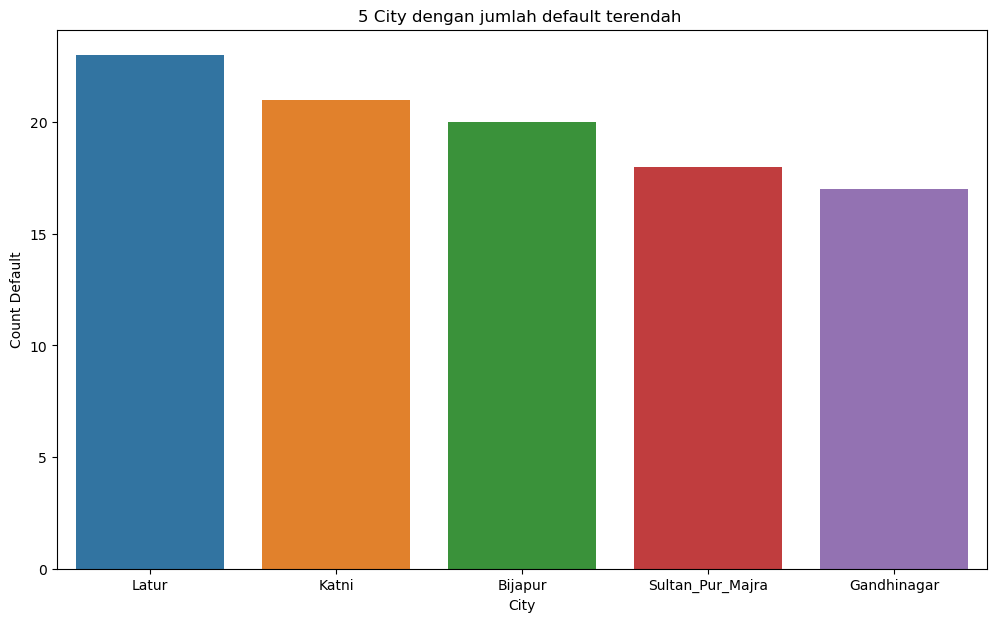

In [38]:
# Bottom 5

plt.figure(figsize=(12,7))
default_city_bottom_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().tail(5)
sns.barplot(x='City', y='Risk_Flag', data=default_city_bottom_5)
plt.ylabel('Count Default')
plt.title('5 City dengan jumlah default terendah ')
plt.show()

Insight :

Kochi, Satna, Buxar[37], Srinagar, dan Indore adalah 5 besar city yang memiliki customer dengan default paling besar; sedangkan Latur, Katni, Bijapur, Sultan_Pur_Majra, Ganhinagar merupakan city dengan jumlah customer default terendah


# Business Recommendation

1. Perusahaan perlu mengurangi/membatasi nasabah yang tidak memiliki mobil karena memiliki resiko gagal bayar lebih tinggi daripada nasabah yang memiliki mobil<br>
2. Perusahaan perlu mengurangi/membatasi nasabah yang memiliki status single daripada status married
3. Perusahaan perlu mengurangi/membatasi nasabah dengan status rumah rented(sewa)
4. Perusahaan perlu mengurangi/membatasi nasabah yang ingin mengajukan pinjaman dari profesi, state, dan city tertentu yang memiliki data historical default tinggi dan menambah nasabah yang berasal dari profesi, state, dan city tertentu yang memiliki data historical default rendah sesuai temuan pada insight

# Feature Engineering (Belum Sampai Sini Untuk Minggu Ini)

In [39]:
# 1. Label Encoding feature category yang sedikit
df_encoding = df.copy()
df_encoding.replace({'Married/Single':{'single':0,'married':1},'House_Ownership':{'rented':0,'owned':1, 'norent_noown' : 2},'Car_Ownership':{'no':0,'yes':1}},inplace=True)

In [40]:
# 2. Pengelompokan Profesi

## perlu diperbaiki bbrp pengelompokkan seperti pada Arts_Entertainment harusnya anggotanya bukan lawyer, geologist, dll

profession_groups = {
    'Engineering': ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Petroleum_Engineer', 'Computer_hardware_engineer', 'Biomedical_Engineer', 'Civil_engineer', 'Industrial_Engineer'],
    'Technology': ['Software_Developer', 'Technical_writer', 'Air_traffic_controller', 'Computer_operator', 'Web_designer', 'Technology_specialist'],
    'Healthcare': ['Physician', 'Dentist', 'Surgeon', 'Microbiologist', 'Scientist'],
    'Finance': ['Financial_Analyst', 'Chartered_Accountant'],
    'Design': ['Architect', 'Designer', 'Graphic_Designer', 'Fashion_Designer'],
    'Management': ['Civil_servant', 'Hotel_Manager', 'Secretary', 'Consultant'],
    'Public_Service': ['Librarian', 'Politician', 'Police_officer', 'Official', 'Magistrate', 'Firefighter', 'Army_officer'],
    'Arts_Entertainment': ['Artist', 'Comedian', 'Aviator', 'Psychologist', 'Lawyer', 'Analyst', 'Geologist', 'Drafter', 'Statistician', 'Chef']
}
df_encoding['Profession_Group'] = df_encoding['Profession'].map({prof: group for group, prof_list in profession_groups.items() for prof in prof_list})

In [41]:
df_encoding

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag,Profession_Group
0,1303834,23,3,0,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Engineering
1,7574516,40,10,0,0,0,Software_Developer,Parbhani,Maharashtra,9,13,0,Technology
2,3991815,66,4,1,0,0,Technical_writer,Alappuzha,Kerala,4,10,0,Technology
3,6256451,41,2,0,0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,Technology
4,5768871,47,11,0,0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,0,Surgeon,Kolkata,West_Bengal,6,11,0,Healthcare
251996,2843572,26,10,0,0,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Public_Service
251997,4522448,46,7,0,0,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,Engineering
251998,6507128,45,0,0,0,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,Design


In [42]:
df_encoding.replace({'Profession_Group':{'Engineering': 0,
                                         'Technology': 1,
                                         'Healthcare' : 2,
                                         'Finance' : 3,
                                         'Design' : 4,
                                         'Management': 5,
                                         'Public_Service': 6,
                                         'Arts_Entertainment': 7}},inplace=True)

df_encoding['Profession_Group'] = df_encoding['Profession_Group'].astype('Int64')

In [43]:
# 3. Pengelompokan Usia (Age Binning)
# Fungsi untuk menentukan generasi berdasarkan usia
def assign_generation(age):
    if 20 <= age < 30:
        return 'Millennials'
    elif 30 <= age < 40:
        return 'Generation X'
    elif 40 <= age < 50:
        return 'Generation Y'
    elif 50 <= age < 60:
        return 'Baby Boomers'
    elif 60 <= age <= 80:
        return 'Silent Generation'
    else:
        return 'Other'

# Menambahkan kolom 'Generation' ke DataFrame
df_encoding['Generation'] = df_encoding['Age'].apply(assign_generation)

In [44]:
df_encoding.replace({'Generation':{'Millennials': 0,
                                'Generation X': 1,
                                'Generation Y' : 2,
                                'Baby Boomers' : 3,
                                'Silent Generation' : 4,
                                'Other': 5}},inplace=True)

df_encoding['Generation'] = df_encoding['Generation'].astype('Int64')

In [45]:
# 3. Rasio Pengalaman Kerja terhadap Umur
df_encoding['Experience_Ratio'] = df_encoding['Experience'] / df_encoding['Age']

# 4. Rasio Jumlah Tahun Pekerjaan terhadap Jumlah Tahun Tinggal di Rumah
df_encoding['Job_House_Duration_Ratio'] = df_encoding['Current_Job_Years'] / df_encoding['Current_House_Years']

In [46]:
# Re-order DataFrame
column_order = ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'City', 'State', 'Current_Job_Years', 'Current_House_Years', 'Profession_Group', 'Generation', 'Experience_Ratio', 'Job_House_Duration_Ratio', 'Risk_Flag']

df_encoding = df_encoding[column_order]

In [47]:
# Check final dataframe after encoding
df_encoding.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Profession_Group,Generation,Experience_Ratio,Job_House_Duration_Ratio,Risk_Flag
0,1303834,23,3,0,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,0.130435,0.230769,0
1,7574516,40,10,0,0,0,Software_Developer,Parbhani,Maharashtra,9,13,1,2,0.250000,0.692308,0
2,3991815,66,4,1,0,0,Technical_writer,Alappuzha,Kerala,4,10,1,4,0.060606,0.400000,0
3,6256451,41,2,0,0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,2,0.048780,0.166667,1
4,5768871,47,11,0,0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,5,2,0.234043,0.214286,1


In [48]:
# Check final dataframe info after encoding
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Income                    252000 non-null  int64  
 1   Age                       252000 non-null  int64  
 2   Experience                252000 non-null  int64  
 3   Married/Single            252000 non-null  int64  
 4   House_Ownership           252000 non-null  int64  
 5   Car_Ownership             252000 non-null  int64  
 6   Profession                252000 non-null  object 
 7   City                      252000 non-null  object 
 8   State                     252000 non-null  object 
 9   Current_Job_Years         252000 non-null  int64  
 10  Current_House_Years       252000 non-null  int64  
 11  Profession_Group          228673 non-null  Int64  
 12  Generation                252000 non-null  Int64  
 13  Experience_Ratio          252000 non-null  f

<Axes: >

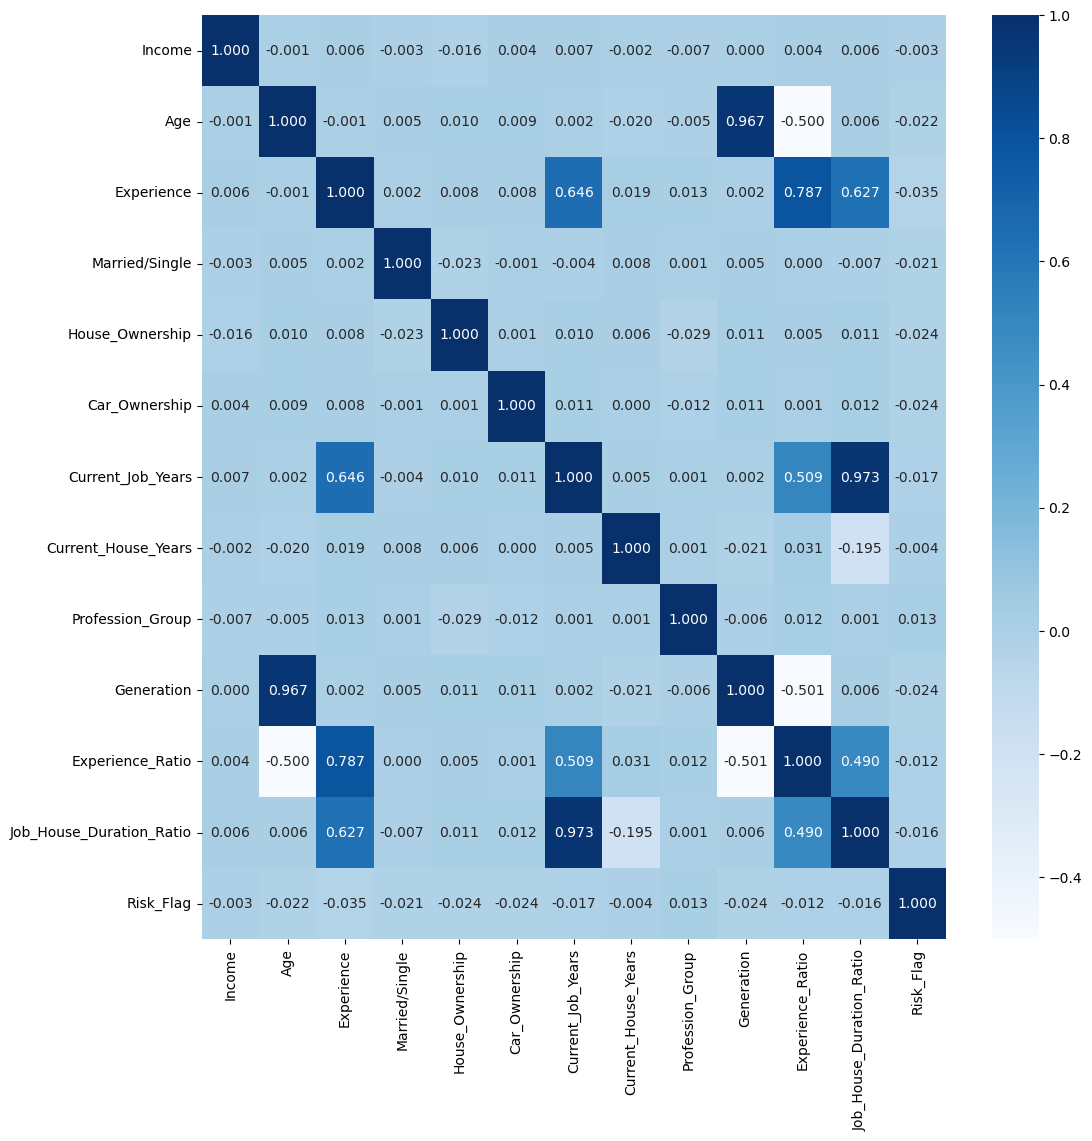

In [49]:
# Heatmap (corr pearson)
plt.figure(figsize=(12,12))
sns.heatmap(data = df_encoding.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f')